CIBER stacking procedure notes: https://docs.google.com/presentation/d/1ji4JgDxm4zp_AnsC_NIpZkusBhD5DtUV4iU9gj9i_Z4/edit#slide=id.g6021744a7c_1_163

# Maps

In [1]:
from reduction import *
from utils import *

data_maps = {1: image_reduction(1), 2: image_reduction(2)}

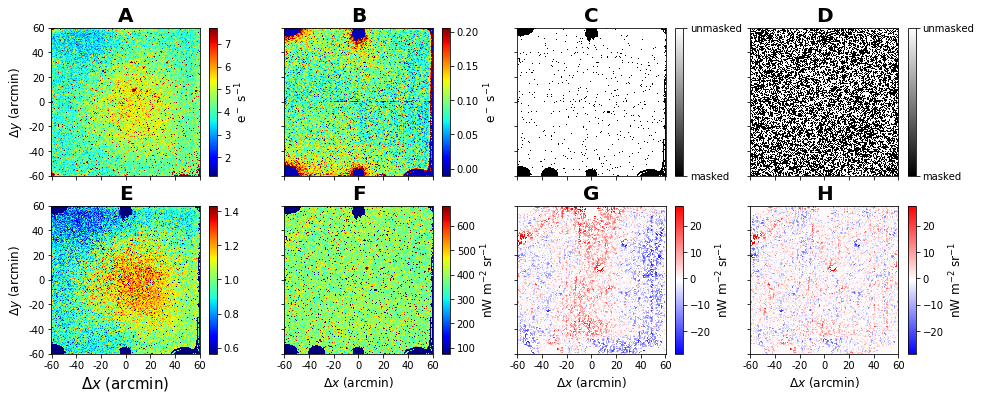

In [4]:
pixticks = np.linspace(0,1023,7)
pixtick_labels = ['-60', '-40', '-20', '0', '20', '40', '60']

for ifield in [4,5,6,7,8]:
    for inst in [1,2]:
        filt_order = filt_order_dict[inst]
        apf2eps = cal_factor_dict['apf2eps'][inst]
        apf2nWpm2psr = cal_factor_dict['apf2nWpm2psr'][inst][ifield]
        rawmap, DCmap, mask_inst, mapin, cbmap, strmask, FF\
        = load_processed_images(data_maps, [(inst,ifield,'rawmap'),
                                            (inst,ifield,'DCmap'),
                                           (inst,ifield,'mask_inst'),
                                           (inst,ifield,'map'),
                                           (inst,ifield,'cbmap'),
                                           (inst,ifield,'strmask'),
                                           (inst,ifield,'FF')],
                               rotate_TM2=True)
        plt.close()
        fig, ax = plt.subplots(2, 4, figsize = (16,6))
        axi = ax[0][0]
        p = imageclip(rawmap*apf2eps, ax=axi, return_objects=True)
        p['cbar'].ax.set_ylabel(r'e$^-$ s$^{-1}$', rotation=90, fontsize=12)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(['']*len(pixticks), fontsize=10)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=10)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=12)
        axi.set_title('A', fontsize=20, weight='bold')
#         axi.text(100,823,'A',fontsize=20, color='white', weight='bold')
        
        axi = ax[0][1]
        p = imageclip(DCmap*apf2eps, ax=axi, return_objects=True)
        p['cbar'].ax.set_ylabel(r'e$^-$ s$^{-1}$', rotation=90, fontsize=12)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(['']*len(pixticks), fontsize=10)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(['']*len(pixticks), fontsize=10)
        axi.set_title('B', fontsize=20, weight='bold')
#         axi.text(100,823,'B',fontsize=20, color='white', weight='bold')
        
        axi = ax[0][2]
        p = imageclip(mask_inst, ax=axi, return_objects=True, cmap='gist_gray', cbar=False)
        cbar = plt.colorbar(p['p'], ticks=[0,1], ax=ax[0][2])
        cbar.ax.set_yticklabels(['masked', 'unmasked'])
        axi.set_xticks(pixticks)
        axi.set_xticklabels(['']*len(pixticks), fontsize=10)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(['']*len(pixticks), fontsize=10)
        axi.set_title('C', fontsize=20, weight='bold')
#         axi.text(100,823,'C',fontsize=20, color='yellowgreen', weight='bold')
        
        axi = ax[0][3]
        p = imageclip(strmask, ax=axi, return_objects=True, cmap='gist_gray', cbar=False)
        cbar = plt.colorbar(p['p'], ticks=[0,1], ax=ax[0][3])
        cbar.ax.set_yticklabels(['masked', 'unmasked'])
        axi.set_xticks(pixticks)
        axi.set_xticklabels(['']*len(pixticks), fontsize=10)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(['']*len(pixticks), fontsize=10)
        axi.set_title('D', fontsize=20, weight='bold')
#         axi.text(100,823,'D',fontsize=20, color='yellowgreen', weight='bold')
        
        axi = ax[1][0]
        p = imageclip(FF, ax=axi, return_objects=True)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=10)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=10)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=12)
        axi.set_title('E', fontsize=20, weight='bold')
#         axi.text(100,823,'E',fontsize=20, color='white', weight='bold')
        
        axi = ax[1][2]
        unfilt_sm = image_smooth_gauss(cbmap*mask_inst*strmask)
        p = imageclip(unfilt_sm, ax=axi, return_objects=True, cmap='bwr')
        p['cbar'].ax.set_ylabel(r'nW m$^{-2}$ sr$^{-1}$', rotation=90, fontsize=12)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=10)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(['']*len(pixticks), fontsize=10)
        axi.set_title('G', fontsize=20, weight='bold')
#         axi.text(100,823,'G',fontsize=20, color='yellowgreen', weight='bold')
        
        axi = ax[1][3]
        filtmap = image_poly_filter(cbmap, strmask*mask_inst, degree=filt_order)
        filt_sm = image_smooth_gauss(filtmap*mask_inst*strmask)
        p = imageclip(filt_sm, ax=axi, 
                      vmin=p['vmin'], vmax=p['vmax'],return_objects=True, cmap='bwr')
        p['cbar'].ax.set_ylabel(r'nW m$^{-2}$ sr$^{-1}$', rotation=90, fontsize=12)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=10)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(['']*len(pixticks), fontsize=10)
        axi.set_title('H', fontsize=20, weight='bold')
#         axi.text(100,823,'H',fontsize=20, color='yellowgreen', weight='bold')
        
        axi = ax[1][1]
        meanmap = np.mean(mapin[mask_inst*strmask==1])*apf2nWpm2psr
        p = imageclip(cbmap*mask_inst*strmask, ax=axi, return_objects=True,cbar=False)
        p = imageclip(mapin*mask_inst*apf2nWpm2psr, ax=axi,
                      vmin=3*p['vmin']+meanmap, vmax=3*p['vmax']+meanmap,return_objects=True)
        p['cbar'].ax.set_ylabel(r'nW m$^{-2}$ sr$^{-1}$', rotation=90, fontsize=12)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=10)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(['']*len(pixticks), fontsize=10)
        axi.set_title('F', fontsize=20, weight='bold')
#         axi.text(100,823,'F',fontsize=20, color='white', weight='bold')
        
        plt.savefig('plots/paperfig/maps_TM%d_%s.pdf'%(inst, fieldnamedict[ifield]),
                    dpi = 100, bbox_inches='tight')

# stacking & excess profile

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in true_divide
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in true_divide
/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils_plotting.py:108: RuntimeWarning: invalid value encountered in greater_equal
  spp = np.where(y>=0)[0]
/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils_plotting.py:109: RuntimeWarning: invalid value encountered in less
  spn = np.where(y<0)[0]
No handles with labels found to put in legend.


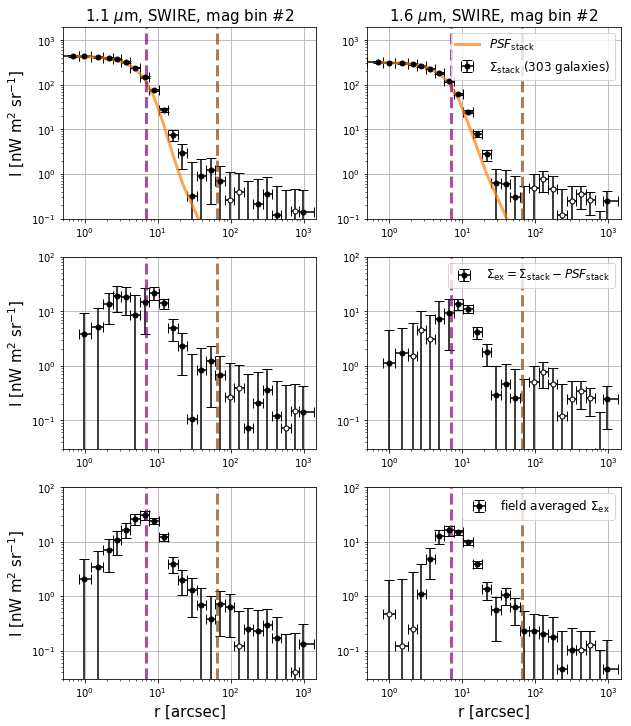

In [27]:
from stack import *

im = 1
m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
ifield = 8

fig, ax = plt.subplots(3,2, figsize = (10,12))
for inst in [1,2]:
    stackdat = stacking(inst, ifield, m_min, m_max,
            load_from_file=True, BGsub=False).stackdat
    plot_err_log(stackdat['rbins'], 
                 stackdat['profcb'],
                 np.sqrt(np.diag(stackdat['cov']['profcb'])),
                 ax=ax[0][inst-1], color='k',
                 label= r'$\Sigma_{\rm stack}$ (%d galaxies)'% stackdat['Nsrc'])
    ax[0][inst-1].loglog(stackdat['rbins'],stackdat['PSF']['profcb'],
                  'C1', alpha=0.7, lw=3, label=r'$PSF_{\rm stack}$')
    ax[0][inst-1].set_ylim([1e-1,2e3])
    ax[0][inst-1].set_xlim([5e-1,1.5e3])
    ax[0][inst-1].grid()    
    ax[0][0].set_ylabel('I [nW m$^2$ sr$^{-1}$]', fontsize=15)
    ax[0][0].set_title('1.1 $\mu$m, %s, '%fieldnamedict[ifield] \
                       + 'mag bin #2', fontsize=15)
    ax[0][1].set_title('1.6 $\mu$m, %s, '%fieldnamedict[ifield] \
                       + 'mag bin #2', fontsize=15)
    ax[0][1].legend(fontsize=12)
    ax[0][inst-1].axvline(66, c='saddlebrown', lw=3, alpha=0.7,ls='--')
    ax[0][inst-1].axvline(7, c='darkmagenta',lw=3, alpha=0.7,ls='--')

    plot_err_log(stackdat['rbins'], 
                 stackdat['ex']['profcb'],
                 np.sqrt(np.diag(stackdat['excov']['profcb'])),
                 ax=ax[1][inst-1], color='k',
                 label=r'$\Sigma_{\rm ex}=\Sigma_{\rm stack} - PSF_{\rm stack}$')
    ax[1][inst-1].set_ylim([3e-2,1e2])
    ax[1][inst-1].set_xlim([5e-1,1.5e3])
    ax[1][0].set_ylabel('I [nW m$^2$ sr$^{-1}$]', fontsize=15)
    ax[1][inst-1].grid()    
    ax[1][1].legend(fontsize=12)
    ax[1][inst-1].axvline(66, c='saddlebrown', lw=3, alpha=0.7,ls='--')
    ax[1][inst-1].axvline(7, c='darkmagenta',lw=3, alpha=0.7,ls='--')
    
    profd_arr, profd_err = 0, 0
    for ifield in [4,5,6,7,8]:
        stackdat = stacking(inst, ifield, m_min, m_max,
                            load_from_file=True, BGsub=False).stackdat

        profd_arri = stackdat['ex']['profcb']
        profd_erri = np.sqrt(np.diag(stackdat['excov']['profcb']))
        profd_arr += profd_arri / profd_erri**2
        profd_err += 1 / profd_erri**2
    profd_arr /= profd_err
    profd_err = np.sqrt(1 / profd_err)
    plot_err_log(stackdat['rbins'], 
                 profd_arr,
                 profd_err,
                 ax=ax[2][inst-1], color='k',label=r'field averaged $\Sigma_{\rm ex}$')
    ax[2][inst-1].set_ylim([3e-2,1e2])
    ax[2][inst-1].set_xlim([5e-1,1.5e3])
    ax[2][inst-1].grid()   
    ax[2][0].set_ylabel('I [nW m$^2$ sr$^{-1}$]', fontsize=15)
    ax[2][inst-1].set_xlabel('r [arcsec]', fontsize=15)
    ax[2][1].legend(fontsize=12)
    ax[2][inst-1].axvline(66, c='saddlebrown', lw=3, alpha=0.7,ls='--')
    ax[2][inst-1].axvline(7, c='darkmagenta',lw=3, alpha=0.7,ls='--')
    
plt.savefig('plots/paperfig/stack_profile.pdf', dpi = 150, bbox_inches='tight')

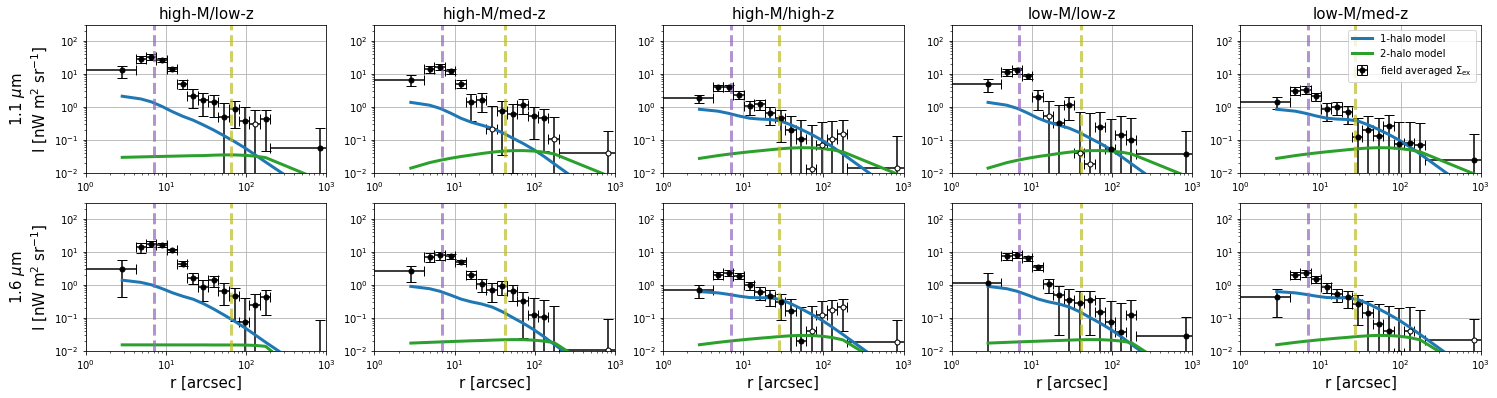

In [1]:
from stack import *
from micecat import *
from micecat_auto import *

fig, ax = plt.subplots(2, 5, figsize = (25,6))

for inst in [1,2]:
    for i,(im,M_min,M_max,R200,name) in enumerate(zip([1,2,3,2,3],
                                            [-23,-23,-23,-22,-22],
                                            [-22,-22,-22,-21,-21],
                                            [64,42,28,41,27],
        ['high-M/low-z','high-M/med-z','high-M/high-z','low-M/low-z','low-M/med-z'])):
        
        m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]

        profdsub_arr, profdsub_err = 0, 0
        for ifield in [4,5,6,7,8]:
            stackdat = stacking(inst, ifield, m_min, m_max, Mabs_min=M_min, Mabs_max=M_max,
                                load_from_file=True, BGsub=False).stackdat

            profdsub_arri = stackdat['ex']['profcbsub']
            profdsub_erri = np.sqrt(np.diag(stackdat['excov']['profcbsub']))
            profdsub_arr += profdsub_arri / profdsub_erri**2
            profdsub_err += 1 / profdsub_erri**2

        profdsub_arr /= profdsub_err
        profdsub_err = np.sqrt(1 / profdsub_err)

        plot_err_log(stackdat['rsubbins'], 
                 profdsub_arr,profdsub_err,
                 xedges = stackdat['rsubbinedges'],
                 ax=ax[inst-1][i], color='k',label=r'field averaged $\Sigma_{\rm ex}$')
        
        _, mc_1h, _, _ = get_micecat_sim_1h(inst, im, Mhcut=1e14, 
                                            R200cut=0, zcut=0.15, sub=True)
        _, mc_2h,  = micecat_profile_fit(inst, im, filt_order=filt_order_dict[inst],
                                         sub=True, return_full=False)

        ax[inst-1][i].plot(stackdat['rsubbins'], mc_1h, 'C0', lw=3, label='1-halo model')
        ax[inst-1][i].plot(stackdat['rsubbins'], mc_2h, 'C2', lw=3, label='2-halo model')
        ax[inst-1][i].set_ylim([1e-2,3e2])
        ax[inst-1][i].set_xlim([1e0,1e3])
        ax[inst-1][i].grid()    
        ax[1][i].set_xlabel('r [arcsec]', fontsize=15)
        ax[0][i].set_title(name, fontsize=15)
        ax[inst-1][i].axvline(R200, c='C8', lw=3, alpha=0.7,ls='--')
        ax[inst-1][i].axvline(7, c='C4',lw=3, alpha=0.7,ls='--')

    ax[0][0].set_ylabel(r'1.1 $\mu$m' + '\n' + r'I [nW m$^2$ sr$^{-1}$]', fontsize=15)
    ax[1][0].set_ylabel(r'1.6 $\mu$m' + '\n' + r'I [nW m$^2$ sr$^{-1}$]', fontsize=15)
    ax[0][-1].legend(fontsize=10)

plt.savefig('plots/paperfig/excess_profile.pdf', dpi = 150, bbox_inches='tight')

# z, M*, Mh, R200 distribution

#### MRR catalog
From MZ, SED fitting In SWIRE

AEGIS: 
https://aegis.ucolick.org/tech_overview.html#derived_data<br>
https://arxiv.org/pdf/astro-ph/0607355.pdf<br>
Not overlap with CIBER

In [46]:
# print fraction of stacked sources is central
from micecat import *

df = get_micecat_df(1, add_Rvir=True)
DM = 5 * np.log10((cosmo.luminosity_distance(df['z_cgal']) / (10 * u.pc)).decompose()).value
df['M_I'] = df['I'] - DM + (2.5 * np.log10(1+df['z_cgal']))

for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    dfi = df.loc[(df['I']>=m_min) & (df['I']<m_max)]
    print('mag bin %d, fcen = %.2f'%(im, np.sum(dfi['flag_central']==0)/len(dfi)))
dfi = df.loc[(df['I']>=17) & (df['I']<20)]
print('mag bin all, fcen = %.2f'%(np.sum(dfi['flag_central']==0)/len(dfi)))
    
for i,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
    m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
    dfi = df.loc[(df['I']>=m_min) & (df['I']<m_max) & (df['M_I']>=M_min) & (df['M_I']<M_max)]
    print('m+M bin %d, fcen = %.2f'%(i, np.sum(dfi['flag_central']==0)/len(dfi)))

MICECAT field 1, 2 < ra < 4, 0 < dec < 2
mag bin 0, fcen = 0.65
mag bin 1, fcen = 0.67
mag bin 2, fcen = 0.62
mag bin 3, fcen = 0.63
mag bin all, fcen = 0.63
m+M bin 0, fcen = 0.66
m+M bin 1, fcen = 0.62
m+M bin 2, fcen = 0.66
m+M bin 3, fcen = 0.57
m+M bin 4, fcen = 0.58


In [79]:
# print Lcore / (Lcore+L1h) to infer the correction factor for Rodriguez-Gomez+16 on fIHL_z plot

from micecat import *

df = get_micecat_df(1, return_full=True)
df['Fnu_I'] = 3631 * 10**(-df['I'] / 2.5)
df['Fnu_H'] = 3631 * 10**(-df['H'] / 2.5)

dfc = df.loc[df['flag_central']==0]
dfsum = df[['unique_halo_id', 'Fnu_I','Fnu_H']].groupby(by="unique_halo_id").sum()
dfsum = dfsum.rename(columns={"Fnu_I": "Fnu_I_sum", "Fnu_H": "Fnu_H_sum"}).reset_index()

dfc=pd.concat([dfc.set_index('unique_halo_id'),dfsum.set_index('unique_halo_id')],
              axis=1, join='inner').reset_index()


zbinedges  = np.arange(0,0.75,0.05)

lmsmin, lmsmax = 10,111
for i,(zmin, zmax) in enumerate(zip(zbinedges[:-1],zbinedges[1:])):
    dfi = dfc.loc[(dfc['z_cgal']>=zmin) & (dfc['z_cgal']<zmax) & \
                 (dfc['lmhalo']>=lmsmin) & (dfc['lmhalo']<lmsmax)]
    if len(dfi)==0:
        continue
    Lcore_Ltot_I = np.array(dfi['Fnu_I']/dfi['Fnu_I_sum'])
    Lcore_Ltot_H = np.array(dfi['Fnu_H']/dfi['Fnu_H_sum'])
    print('%.2f < z < %.2f, Lcore/(Lcore+L1h) = %.2f (I),%.2f (H)'\
          %(zmin, zmax, np.mean(Lcore_Ltot_I), np.mean(Lcore_Ltot_H)))
print('=====')
lmsmin, lmsmax = 11,12
for i,(zmin, zmax) in enumerate(zip(zbinedges[:-1],zbinedges[1:])):
    dfi = dfc.loc[(dfc['z_cgal']>=zmin) & (dfc['z_cgal']<zmax) & \
                 (dfc['lmhalo']>=lmsmin) & (dfc['lmhalo']<lmsmax)]
    if len(dfi)==0:
        continue
    Lcore_Ltot_I = np.array(dfi['Fnu_I']/dfi['Fnu_I_sum'])
    Lcore_Ltot_H = np.array(dfi['Fnu_H']/dfi['Fnu_H_sum'])
    print('%.2f < z < %.2f, Lcore/(Lcore+L1h) = %.2f (I),%.2f (H)'\
          %(zmin, zmax, np.mean(Lcore_Ltot_I), np.mean(Lcore_Ltot_H)))

0.05 < z < 0.10, Lcore/(Lcore+L1h) = 0.94 (I),0.94 (H)
0.10 < z < 0.15, Lcore/(Lcore+L1h) = 0.94 (I),0.94 (H)
0.15 < z < 0.20, Lcore/(Lcore+L1h) = 0.94 (I),0.94 (H)
0.20 < z < 0.25, Lcore/(Lcore+L1h) = 0.94 (I),0.94 (H)
0.25 < z < 0.30, Lcore/(Lcore+L1h) = 0.95 (I),0.94 (H)
0.30 < z < 0.35, Lcore/(Lcore+L1h) = 0.94 (I),0.94 (H)
0.35 < z < 0.40, Lcore/(Lcore+L1h) = 0.94 (I),0.94 (H)
0.40 < z < 0.45, Lcore/(Lcore+L1h) = 0.93 (I),0.93 (H)
0.45 < z < 0.50, Lcore/(Lcore+L1h) = 0.92 (I),0.92 (H)
0.50 < z < 0.55, Lcore/(Lcore+L1h) = 0.92 (I),0.91 (H)
0.55 < z < 0.60, Lcore/(Lcore+L1h) = 0.92 (I),0.91 (H)
0.60 < z < 0.65, Lcore/(Lcore+L1h) = 0.91 (I),0.91 (H)
0.65 < z < 0.70, Lcore/(Lcore+L1h) = 0.92 (I),0.92 (H)
=====
0.05 < z < 0.10, Lcore/(Lcore+L1h) = 0.92 (I),0.92 (H)
0.10 < z < 0.15, Lcore/(Lcore+L1h) = 0.90 (I),0.90 (H)
0.15 < z < 0.20, Lcore/(Lcore+L1h) = 0.90 (I),0.89 (H)
0.20 < z < 0.25, Lcore/(Lcore+L1h) = 0.91 (I),0.91 (H)
0.25 < z < 0.30, Lcore/(Lcore+L1h) = 0.91 (I),0.91 (H)
0.30

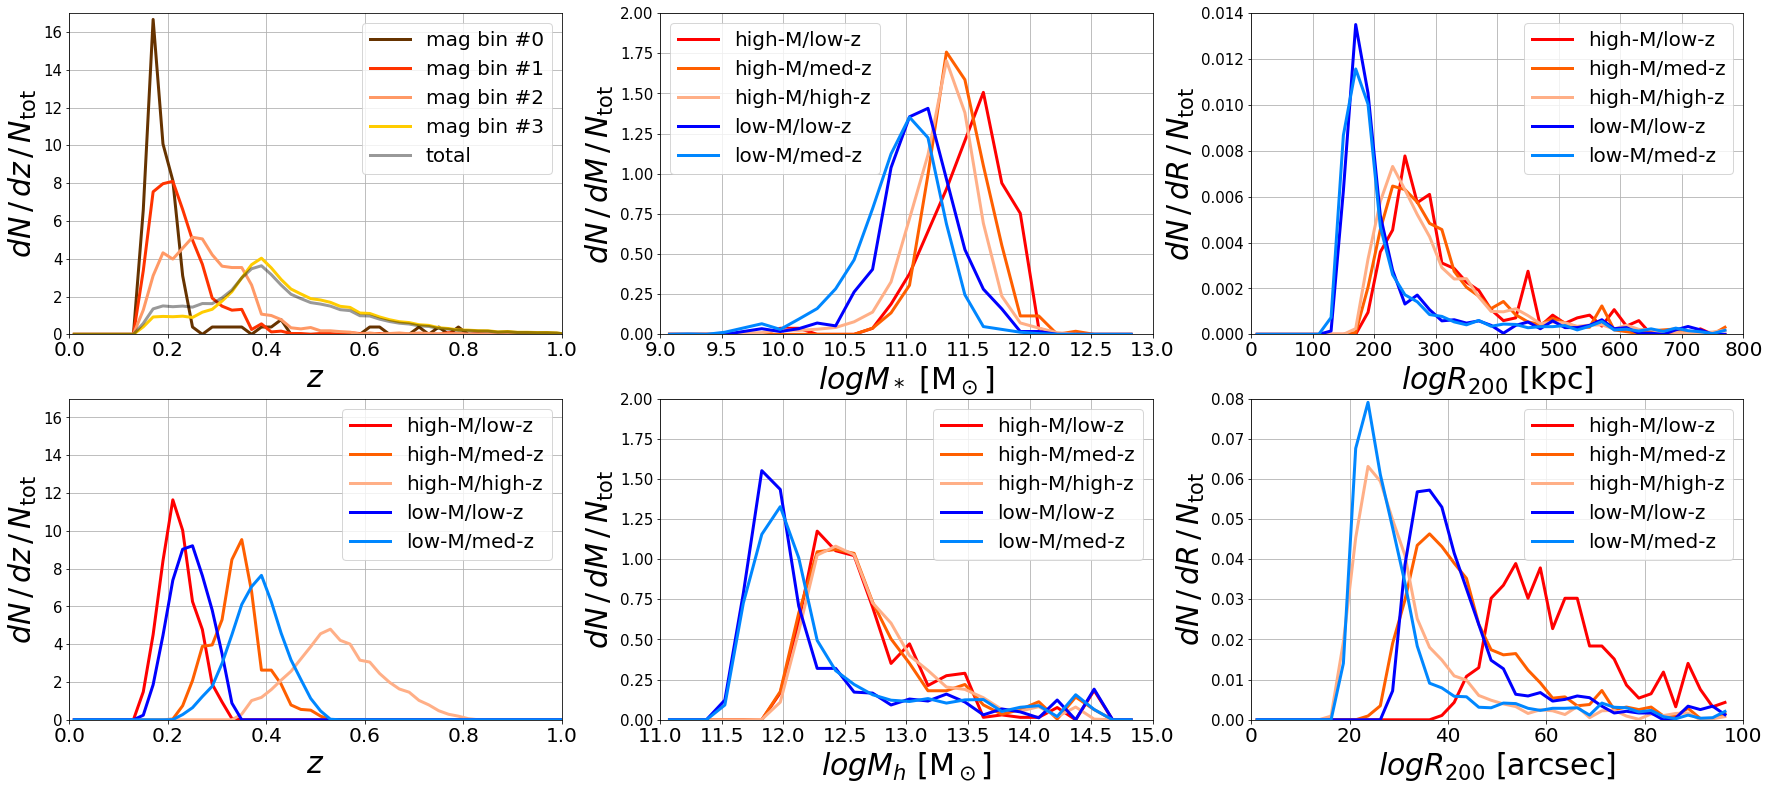

In [8]:
'''
from stack_ancillary import *
from micecat import *
from reduction import *
# data_maps = {1: image_reduction(1), 2: image_reduction(2)}

df = get_micecat_df(0, add_Rvir=True)
DM = 5 * np.log10((cosmo.luminosity_distance(df['z_cgal']) / (10 * u.pc)).decompose()).value
df['M_I'] = df['I'] - DM + (2.5 * np.log10(1+df['z_cgal']))

mrrdata = loadmat(mypaths['ciberdir']+'doc/20170617_Stacking/maps/mrrcats/mrr_cat_SWIRE.mat')
dfmrr = pd.DataFrame()
column_names = ['ra','dec','zm','zme','mst','z','av','ze','npts','mass'] # data['cat'][0].dtype
for i,name in enumerate(column_names):
    dfmrr[name] = mrrdata['cat'][0,0][i].flatten()
dfmrr = dfmrr.loc[dfmrr['mst']>0]
dfmrr = dfmrr.loc[dfmrr['mass']!=0]

data = {}
# mag bins
data['mag'] = {}
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    print(im)
    data['mag'][im] = {}
    zs = np.array([])
    for i,ifield in enumerate([4,5,6,7,8]):
        mask_inst1, mask_inst2 = \
        load_processed_images(data_maps, 
                              return_names=[(1,ifield,'mask_inst'),(2,ifield,'mask_inst')])
        field = fieldnamedict[ifield]
        srcdat = ps_src_select(1, ifield, m_min, m_max, 
            [mask_inst1, mask_inst2], sample_type='all')
        z = np.array(srcdat['zg_arr'])
        zs = np.concatenate((zs,z))
       
    dfps = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[8] + '.csv')
    dfps = dfps.iloc[srcdat['idxg_arr']]
    dfps, dfmrr1 = match_catalog_by_coord(dfps,dfmrr)
    dfps['mass'] = dfmrr1['mass'].values
    data['mag'][im]['logMstr'] = dfps['mass'].values
    
    data['mag'][im]['z'] = zs
    dfi = df.loc[(df['I']>=m_min) & (df['I']<m_max)]
    data['mag'][im]['logMh'] = dfi['lmhalo'].values
    data['mag'][im]['Rv_kpc'] = dfi['Rv_Mpc'].values * 1e3
    data['mag'][im]['Rv_arcsec'] = dfi['Rv_arcsec'].values

data['mag']['all'] = {}
data['mag']['all']['z'] = np.concatenate((data['mag'][1]['z'],
                                          data['mag'][2]['z'],data['mag'][3]['z']))
data['mag']['all']['logMh'] = np.concatenate((data['mag'][1]['logMh'],
                                          data['mag'][2]['logMh'],data['mag'][3]['logMh']))
data['mag']['all']['logMstr'] = np.concatenate((data['mag'][1]['logMstr'],
                                          data['mag'][2]['logMstr'],data['mag'][3]['logMstr']))
data['mag']['all']['Rv_kpc'] = np.concatenate((data['mag'][1]['Rv_kpc'],
                                          data['mag'][2]['Rv_kpc'],data['mag'][3]['Rv_kpc']))
data['mag']['all']['Rv_arcsec'] = np.concatenate((data['mag'][1]['Rv_arcsec'],
                                          data['mag'][2]['Rv_arcsec'],data['mag'][3]['Rv_arcsec']))


# mag + Mag bins
data['Mag'] = {}
for i,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
    data['Mag'][i] = {}
    zs = np.array([])
    m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
    for ifield in [4,5,6,7,8]:
        mask_inst1, mask_inst2 = \
        load_processed_images(data_maps, 
                              return_names=[(1,ifield,'mask_inst'),(2,ifield,'mask_inst')])
        field = fieldnamedict[ifield]
        srcdat = ps_src_select(1, ifield, m_min, m_max, 
            [mask_inst1, mask_inst2], Mabs_min=M_min, Mabs_max=M_max,sample_type='all')
        z = np.array(srcdat['zg_arr'])
        zs = np.concatenate((zs,z))

    dfps = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[8] + '.csv')
    dfps = dfps.iloc[srcdat['idxg_arr']]
    dfps, dfmrr1 = match_catalog_by_coord(dfps,dfmrr)
    dfps['mass'] = dfmrr1['mass'].values
    data['Mag'][i]['logMstr'] = dfps['mass'].values
    
    data['Mag'][i]['z'] = zs
    dfi = df.loc[(df['I']>=m_min) & (df['I']<m_max) & (df['M_I']>=M_min) & (df['M_I']<M_max)]
    data['Mag'][i]['logMh'] = dfi['lmhalo'].values
    data['Mag'][i]['Rv_kpc'] = dfi['Rv_Mpc'].values * 1e3
    data['Mag'][i]['Rv_arcsec'] = dfi['Rv_arcsec'].values

dz = 0.02
zbinedges = np.arange(0,1.1,dz)
zbins = (zbinedges[1:] + zbinedges[:-1]) / 2
logMhbinedges = np.arange(11,15,0.15)
logMhbins = (logMhbinedges[1:] + logMhbinedges[:-1]) / 2
logMstrbinedges = np.arange(9,13,0.15)
logMstrbins = (logMstrbinedges[1:] + logMstrbinedges[:-1]) / 2
Rvkpcbinedges = np.arange(0,800,20)
Rvkpcbins = (Rvkpcbinedges[1:] + Rvkpcbinedges[:-1]) / 2
Rvarcsecbinedges = np.arange(0,100,2.5)
Rvarcsecbins = (Rvarcsecbinedges[1:] + Rvarcsecbinedges[:-1]) / 2
'''
fig, ax = plt.subplots(2, 3, figsize = (30, 13))
for im,(m_min,m_max,c) in enumerate(zip(magbindict['m_min'],magbindict['m_max'],
                                       ['#663300','#ff3300','#ff9966','#ffcc00'])):
    print('mag bin %d, Nsrc = %d'%(im, len(data['mag'][im]['z'])))
    print('mag bin %d, z = %.2f + %.2f - %.2f'%(im, np.median(data['mag'][im]['z']),
            np.percentile(data['mag'][im]['z'],16),np.percentile(data['mag'][im]['z'],84)))
    print('mag bin %d, M* = %.1f + %.1f - %.1f'%(im, np.median(data['mag'][im]['logMstr']),
            np.percentile(data['mag'][im]['logMstr'],16),np.percentile(data['mag'][im]['logMstr'],84)))
    print('mag bin %d, Mh = %.1f + %.1f - %.1f'%(im, np.median(data['mag'][im]['logMh']),
            np.percentile(data['mag'][im]['logMh'],16),np.percentile(data['mag'][im]['logMh'],84)))
    print('mag bin %d, Rv(kpc) = %.1f + %.1f - %.1f'%(im, np.median(data['mag'][im]['Rv_kpc']),
            np.percentile(data['mag'][im]['Rv_kpc'],16),np.percentile(data['mag'][im]['Rv_kpc'],84)))
    print('mag bin %d, Rv(arcsec) = %.1f + %.1f - %.1f'%(im, np.median(data['mag'][im]['Rv_arcsec']),
            np.percentile(data['mag'][im]['Rv_arcsec'],16),np.percentile(data['mag'][im]['Rv_arcsec'],84)))
    print('=========================')
    h = np.histogram(data['mag'][im]['z'], bins=zbinedges)[0]
    ax[0][0].plot(zbins, h/np.sum(h)/dz, lw=3,  c=c,
        label='mag bin #%d'%im)
    
im,m_min, m_max = 'all',17,20
print('mag bin tot, Nsrc = %d'%(len(data['mag'][im]['z'])))
print('mag bin tot, z = %.2f + %.2f - %.2f'%(np.median(data['mag'][im]['z']),
        np.percentile(data['mag'][im]['z'],16),np.percentile(data['mag'][im]['z'],84)))
print('mag bin tot, M* = %.1f + %.1f - %.1f'%(np.median(data['mag'][im]['logMstr']),
        np.percentile(data['mag'][im]['logMstr'],16),np.percentile(data['mag'][im]['logMstr'],84)))
print('mag bin tot, Mh = %.1f + %.1f - %.1f'%(np.median(data['mag'][im]['logMh']),
        np.percentile(data['mag'][im]['logMh'],16),np.percentile(data['mag'][im]['logMh'],84)))
print('mag bin tot, Rv(kpc) = %.1f + %.1f - %.1f'%(np.median(data['mag'][im]['Rv_kpc']),
        np.percentile(data['mag'][im]['Rv_kpc'],16),np.percentile(data['mag'][im]['Rv_kpc'],84)))
print('mag bin tot, Rv(arcsec) = %.1f + %.1f - %.1f'%(np.median(data['mag'][im]['Rv_arcsec']),
        np.percentile(data['mag'][im]['Rv_arcsec'],16),np.percentile(data['mag'][im]['Rv_arcsec'],84)))
print('=========================')
h = np.histogram(data['mag'][im]['z'], bins=zbinedges)[0]
ax[0][0].plot(zbins, h/np.sum(h)/dz, lw=3,  c='k', alpha=0.4,
    label='total')

for i,(im,M_min,M_max,c,name) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21],
                                         ['#ff0000','#ff5f00','#ffaf87','#0000ff','#0087ff'],
                                        ['high-M/low-z','high-M/med-z','high-M/high-z',
                                         'low-M/low-z','low-M/med-z'])):
    print('mag bin %d, Nsrc = %d'%(i,len(data['Mag'][i]['z'])))
    print('Mag bin %d, z = %.2f + %.2f - %.2f'%(i, np.median(data['Mag'][i]['z']),
            np.percentile(data['Mag'][i]['z'],16),np.percentile(data['Mag'][i]['z'],84)))
    print('Mag bin %d, M* = %.1f + %.3f - %.1f'%(i, np.median(data['Mag'][i]['logMstr']),
            np.percentile(data['Mag'][i]['logMstr'],16),np.percentile(data['Mag'][i]['logMstr'],84)))
    print('Mag bin %d, Mh = %.1f + %.3f - %.1f'%(i, np.median(data['Mag'][i]['logMh']),
            np.percentile(data['Mag'][i]['logMh'],16),np.percentile(data['Mag'][i]['logMh'],84)))
    print('Mag bin %d, Rv(kpc) = %.1f + %.3f - %.1f'%(i, np.median(data['Mag'][i]['Rv_kpc']),
            np.percentile(data['Mag'][i]['Rv_kpc'],16),np.percentile(data['Mag'][i]['Rv_kpc'],84)))
    print('Mag bin %d, Rv(arcsec) = %.1f + %.3f - %.1f'%(i, np.median(data['Mag'][i]['Rv_arcsec']),
            np.percentile(data['Mag'][i]['Rv_arcsec'],16),np.percentile(data['Mag'][i]['Rv_arcsec'],84)))
    print('=========================')

    h = np.histogram(data['Mag'][i]['z'], bins=zbinedges)[0]
    ax[1][0].plot(zbins, h/np.sum(h)/dz, lw=3,  c=c, label=name)
    
    h = np.histogram(data['Mag'][i]['logMstr'], bins=logMstrbinedges)[0]
    ax[0][1].plot(logMstrbins, h/np.sum(h)/np.diff(logMstrbins)[0], lw=3,  c=c, label=name)
    h = np.histogram(data['Mag'][i]['logMh'], bins=logMhbinedges)[0]
    ax[1][1].plot(logMhbins, h/np.sum(h)/np.diff(logMhbins)[0], lw=3,  c=c, label=name)

    h = np.histogram(data['Mag'][i]['Rv_kpc'], bins=Rvkpcbinedges)[0]
    ax[0][2].plot(Rvkpcbins, h/np.sum(h)/np.diff(Rvkpcbins)[0], lw=3,  c=c, label=name)
    h = np.histogram(data['Mag'][i]['Rv_arcsec'], bins=Rvarcsecbinedges)[0]
    ax[1][2].plot(Rvarcsecbins, h/np.sum(h)/np.diff(Rvarcsecbins)[0], lw=3,  c=c, label=name)

ax[0][0].set_xlabel('$z$', fontsize=30)
ax[0][0].set_ylabel(r'$dN\,/\,dz\,/\,N_{\rm tot}$', fontsize=30)
ax[0][0].tick_params(axis='x', labelsize=20)
ax[0][0].tick_params(axis='y', labelsize=15)
ax[0][0].legend(fontsize=20)
ax[0][0].set_ylim([0,17])
ax[0][0].set_xlim([0,1])
ax[0][0].grid()

ax[1][0].set_xlabel('$z$', fontsize=30)
ax[1][0].set_ylabel(r'$dN\,/\,dz\,/\,N_{\rm tot}$', fontsize=30)
ax[1][0].tick_params(axis='x', labelsize=20)
ax[1][0].tick_params(axis='y', labelsize=15)
ax[1][0].legend(fontsize=20)
ax[1][0].set_ylim([0,17])
ax[1][0].set_xlim([0,1])
ax[1][0].grid()

ax[0][1].set_xlabel('$logM_*$ [M$_\odot$]', fontsize=30)
ax[0][1].set_ylabel(r'$dN\,/\,dM\,/\,N_{\rm tot}$', fontsize=30)
ax[0][1].tick_params(axis='x', labelsize=20)
ax[0][1].tick_params(axis='y', labelsize=15)
ax[0][1].legend(fontsize=20)
ax[0][1].set_ylim([0,2])
ax[0][1].set_xlim([9,13])
ax[0][1].grid()

ax[1][1].set_xlabel('$logM_h$ [M$_\odot$]', fontsize=30)
ax[1][1].set_ylabel(r'$dN\,/\,dM\,/\,N_{\rm tot}$', fontsize=30)
ax[1][1].tick_params(axis='x', labelsize=20)
ax[1][1].tick_params(axis='y', labelsize=15)
ax[1][1].legend(fontsize=20)
ax[1][1].set_ylim([0,2])
ax[1][1].set_xlim([11,15])
ax[1][1].grid()

ax[0][2].set_xlabel('$logR_{200}$ [kpc]', fontsize=30)
ax[0][2].set_ylabel(r'$dN\,/\,dR\,/\,N_{\rm tot}$', fontsize=30)
ax[0][2].tick_params(axis='x', labelsize=20)
ax[0][2].tick_params(axis='y', labelsize=15)
ax[0][2].legend(fontsize=20)
ax[0][2].set_ylim([0,0.014])
ax[0][2].set_xlim([0,800])
ax[0][2].grid()

ax[1][2].set_xlabel('$logR_{200}$ [arcsec]', fontsize=30)
ax[1][2].set_ylabel(r'$dN\,/\,dR\,/\,N_{\rm tot}$', fontsize=30)
ax[1][2].tick_params(axis='x', labelsize=20)
ax[1][2].tick_params(axis='y', labelsize=15)
ax[1][2].legend(fontsize=20)
ax[1][2].set_ylim([0,0.08])
ax[1][2].set_xlim([0,100])
ax[1][2].grid()

clear_output()
plt.savefig('plots/paperfig/bins_hist.pdf', dpi = 100, bbox_inches='tight')

# PSF

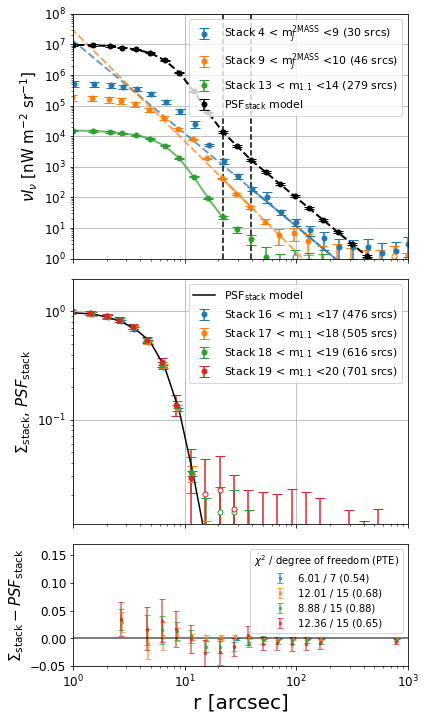

In [21]:
from psfsynth import *
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=[6,12])
gs = gridspec.GridSpec(3, 1, height_ratios=[2,2,1])
ax0= plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0)
ax2 = plt.subplot(gs[2], sharex = ax0)
inst = 1
ifield = 8

m_min, m_max = 4,9
fname = mypaths['alldat'] + 'TM'+ str(inst) + \
'/psfdata_synth_2m_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
with open(fname, "rb") as f:
    profdat = pickle.load(f)
plot_err_log(profdat['rbins']*1.02,
             profdat['profcb'],
             profdat['profcb_err'], plot_xerr=False,
             ax=ax0, color='C0',
             label=r'Stack %d < m$_J^{\rm 2MASS}$ <%d (%d srcs)'\
             %(m_min, m_max, profdat['Nsrc']))       
slope_out = np.polyfit(np.log10(profdat['rbins'][11:17]),
                   np.log10(profdat['profcb'][11:17]),1)[0]
proffit = 10 ** (slope_out * np.log10(profdat['rbins']))
proffit = proffit/proffit[13]*profdat['profcb'][13]
ax0.plot(profdat['rbins'], proffit, color='C0', ls='--', lw=2, alpha=0.7)
ax0.plot(profdat['rbins'][13:], proffit[13:], color='C0', lw=2, alpha=0.7)

m_min, m_max = 9,10
fname = mypaths['alldat'] + 'TM'+ str(inst) +\
 '/psfdata_synth_2m_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
with open(fname, "rb") as f:
    profdat = pickle.load(f)
plot_err_log(profdat['rbins']*0.98,
             profdat['profcb'],
             profdat['profcb_err'], plot_xerr=False,
             ax=ax0, color='C1',
             label=r'Stack %d < m$_J^{\rm 2MASS}$ <%d (%d srcs)'%(m_min, m_max, profdat['Nsrc']))
slope_mid = np.polyfit(np.log10(profdat['rbins'][11:15]),
                    np.log10(profdat['profcb'][11:15]),1)[0]
proffit = 10 ** (slope_mid * np.log10(profdat['rbins']))
proffit = proffit/proffit[13]*profdat['profcb'][13]
ax0.plot(profdat['rbins'], proffit, color='C1', ls='--',lw=2, alpha=0.7)
ax0.plot(profdat['rbins'][11:14], proffit[11:14], color='C1', lw=2, alpha=0.7)

m_min, m_max = 13, 14
fname = mypaths['alldat'] + 'TM'+ str(inst) + \
'/psfdata_synth_ps_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
with open(fname, "rb") as f:
    profdat = pickle.load(f)
plot_err_log(profdat['rbins'],
             profdat['profcb'],
             profdat['profcb_err'], plot_xerr=False,
             ax=ax0, color='C2',
             label=r'Stack %d < m$_{\rm 1.1}$ <%d (%d srcs)'%(m_min, m_max, profdat['Nsrc']))
ax0.plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C2', lw=2, alpha=0.7)
fname = mypaths['alldat'] + 'TM'+ str(inst) +\
 '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
with open(fname,"rb") as f:
    profdat = pickle.load(f)
plot_err_log(profdat['rbins'],
             profdat[0]['comb']['profcb']*1e7,
             profdat[0]['comb']['profcb_err']*1e7, plot_xerr=False,
             ax=ax0, color='k',label=r'PSF$_{\rm stack}$ model')
ax0.loglog(profdat['rbins'], profdat[0]['comb']['profcb']*1e7,'k--', lw=2)
ax0.axvline(profdat['rbins'][11],c='k',ls='--')
ax0.axvline(profdat['rbins'][13],c='k',ls='--')

profdat = run_psf_combine(inst, ifield, savedata=False)
psf = profdat[0]['comb']['profcb']
psf_err = profdat[0]['comb']['profcb_err']
for im,(m_min, m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    Nsubbin_head = 14 if im==0 else 6           
    subsub = True if im==0 else False
    stackdat = stacking(inst, ifield, m_min, m_max, 
                load_from_file=True, BGsub=False, subsub=subsub).stackdat
    r_arr = stackdat['rsubbins']

    psf, psfcov, psfsub, psfcovsub = profile_cov_normalize(profdat[0]['comb']['profcb'],
                                                           profdat[0]['comb']['cov'],
                                                           profdat[0]['comb']['hit'],
                                                          Nsubbin_head=Nsubbin_head)
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_ps_%s_%d_%d_gaia_match_svm.pkl'%(fieldnamedict[ifield],m_min, m_max)
    with open(fname, "rb") as f:
        profdatg = pickle.load(f)
    plot_err_log(profdatg['rbins']*(0.97-im*0.01),
                 profdatg['profcb']/profdatg['profcb'][0],
                 profdatg['profcb_err']/profdatg['profcb'][0],
                 ax=ax1, color='C'+str(im), plot_xerr=False,
                 label=r'Stack %d < m$_{\rm 1.1}$ <%d (%d srcs)'%(m_min, m_max,profdatg['Nsrc']))

    prof, cov, profsub, covsub = profile_cov_normalize(profdatg['profcb'],
                                                       profdatg['cov'],
                                                       profdatg['profhit'],
                                                      Nsubbin_head=Nsubbin_head)
    rerr = np.sqrt(np.diag(covsub+psfcovsub))
    D = (profsub - psfsub).reshape(1,-1)
    U,s,VT = np.linalg.svd(covsub+psfcovsub)
    Cinv = VT.T@np.diag(1/s)@U.T
    chi2 = (D@Cinv@D.T) * (64 - len(profsub) - 2) / (64 - 1)
    pte = scipy.stats.distributions.chi2.sf(chi2, len(profsub))
    ax2.errorbar(r_arr*(0.97-im*0.01), profsub - psfsub, rerr,
                       fmt ='.', color='C'+str(im), capsize=3, markersize=5, alpha=0.7,
               label='%.2f / %d (%.2f)' %(chi2,len(profsub),pte))        
ax2.axhline(0,c='k',lw=2,alpha=0.5)
ax0.set_ylabel(r'$\nu I_\nu$ [nW m$^{-2}$ sr$^{-1}$]',fontsize=15)
ax0.legend(fontsize=11,loc=1)
# ax0.set_ylim([1e-1,1e6])
ax0.set_ylim([1e0,1e8])
ax0.tick_params(labelsize=12)
ax0.grid()

ax1.loglog(profdat['rbins'], psf, 'k-',label=r'PSF$_{\rm stack}$ model')
ax1.grid()
ax1.legend(fontsize=11)
ax1.set_ylim([1.1e-2,2])
ax1.set_xlim([5e-1,40])
ax1.set_xlim([1e0,1e3])
ax1.tick_params(labelsize=12)
ax1.set_ylabel(r'$\Sigma_{\rm stack}$, $PSF_{\rm stack}$', fontsize=15)

ax2.set_xscale('log')
ax2.legend(loc=1, fontsize=10,title=r'$\chi^2$ / degree of freedom (PTE)')
ax2.set_xlim([1e0,1e3])
ax2.set_ylim([-0.05,0.17])
ax2.tick_params(labelsize=12)
ax2.set_xlabel('r [arcsec]', fontsize=20)
ax2.set_ylabel(r'$\Sigma_{\rm stack}-PSF_{\rm stack}$', fontsize=15)
ax0.tick_params(axis='x',labelbottom=False)
ax1.tick_params(axis='x',labelbottom=False)
plt.subplots_adjust(hspace=0.1)
# fig.savefig('plots/paperfig/PSF.pdf', dpi = 150, bbox_inches='tight')
fig.savefig('plots/paperfig/PSF.png', dpi = 150, bbox_inches='tight')

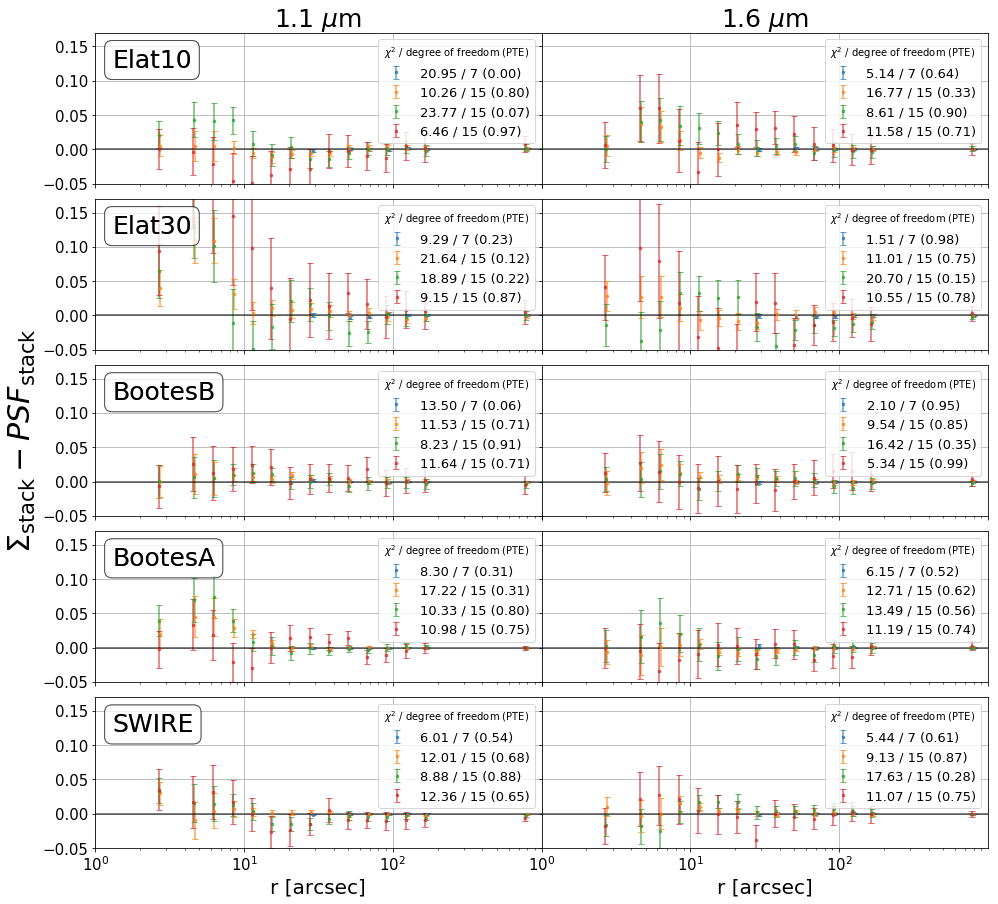

In [20]:
from psfsynth import *
import matplotlib.gridspec as gridspec

fieldnamedict = {4:'Elat10',
                 5:'Elat30',
                 6:'BootesB',
                 7:'BootesA',
                 8:'SWIRE'}

fig,ax = plt.subplots(5,2,figsize=(16,15))
plt.subplots_adjust(hspace=.1,wspace=.0)

for inst in [1,2]:
    for i,ifield in enumerate([4,5,6,7,8]):
        psfdat = run_psf_combine(inst, ifield, savedata=False)
        psf = psfdat[0]['comb']['profcb']
        psf_err = psfdat[0]['comb']['profcb_err']

        for im,(m_min, m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
            Nsubbin_head = 14 if im==0 else 6
            subsub = True if im==0 else False
            stackdat = stacking(inst, ifield, m_min, m_max, 
                        load_from_file=True, BGsub=False, subsub=subsub).stackdat
            r_arr = stackdat['rsubbins']
            
            psf, psfcov, psfsub, psfcovsub = profile_cov_normalize(psfdat[0]['comb']['profcb'],
                                                                   psfdat[0]['comb']['cov'],
                                                                   psfdat[0]['comb']['hit'],
                                                                  Nsubbin_head=Nsubbin_head)

            fname = mypaths['alldat'] + 'TM'+ str(inst) +\
             '/psfdata_synth_ps_%s_%d_%d_gaia_match_svm.pkl'%(fieldnamedict[ifield],m_min, m_max)
            with open(fname, "rb") as f:
                profdat = pickle.load(f)
            prof, cov, profsub, covsub = profile_cov_normalize(profdat['profcb'],
                                                               profdat['cov'],
                                                               profdat['profhit'],
                                                              Nsubbin_head=Nsubbin_head)
            rerr = np.sqrt(np.diag(covsub+psfcovsub))
            D = (profsub - psfsub).reshape(1,-1)
            U,s,VT = np.linalg.svd(covsub+psfcovsub)
            Cinv = VT.T@np.diag(1/s)@U.T
            chi2 = (D@Cinv@D.T) * (64 - len(profsub) - 2) / (64 - 1)        
            pte = scipy.stats.distributions.chi2.sf(chi2, len(profsub))
            ax[i][inst-1].errorbar(r_arr*(0.97-im*0.01), profsub - psfsub, rerr,
                               fmt ='.', color='C'+str(im), capsize=3, markersize=5, alpha=0.7,
           label=r'%.2f / %d (%.2f)'%(chi2,len(profsub),pte))        
        ax[i][inst-1].axhline(0,c='k',lw=2,alpha=0.5)
        ax[i][inst-1].set_xscale('log')
        ax[i][inst-1].grid()
        ax[i][inst-1].legend(fontsize=13,loc=1, title=r'$\chi^2$ / degree of freedom (PTE)')
        ax[i][inst-1].set_xlim([1e0,1e3])
        ax[i][inst-1].set_ylim([-0.05,0.17])
        ax[i][inst-1].tick_params(labelsize=10)
        ax[i][0].text(1.3,0.12,'%s'%fieldnamedict[ifield],fontsize=25,
                      bbox={'boxstyle':'round','facecolor': 'white', 'alpha':0.5})
        ax[i][0].tick_params(axis='y',labelbottom=False,labelleft=True)
        ax[i][1].tick_params(axis='y',labelbottom=False,labelleft=False)
        ax[i][0].tick_params(axis='x',labelbottom=False,labelleft=False)
        ax[i][1].tick_params(axis='x',labelbottom=False,labelleft=False)
        ax[i][0].tick_params(labelsize=15)
        ax[i][1].tick_params(labelsize=15)
ax[2][0].set_ylabel(r'$\Sigma_{\rm stack}-PSF_{\rm stack}$', fontsize=30)

ax[-1][0].set_xticks([1e0,1e1,1e2])
ax[-1][0].tick_params(axis='x',labelbottom=True,labelleft=False)
ax[-1][1].set_xticks([1e0,1e1,1e2])
ax[-1][1].tick_params(axis='x',labelbottom=True,labelleft=False)
ax[-1][0].set_xlabel('r [arcsec]', fontsize=20)
ax[-1][1].set_xlabel('r [arcsec]', fontsize=20)
ax[0][0].set_title(r'1.1 $\mu$m',fontsize=25)
ax[0][1].set_title(r'1.6 $\mu$m',fontsize=25)
fig.savefig('plots/paperfig/PSF_test_all.pdf', dpi = 150, bbox_inches='tight')

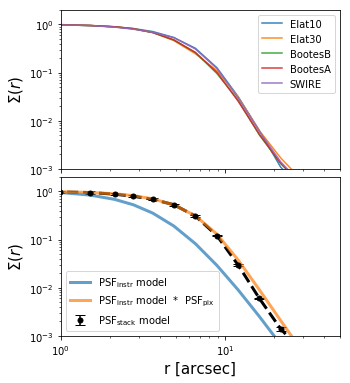

In [15]:
from psfsynth import *
import matplotlib.gridspec as gridspec

fieldnamedict = {4:'Elat10',
                 5:'Elat30',
                 6:'BootesB',
                 7:'BootesA',
                 8:'SWIRE'}
inst = 1
ifield = 8

fig, ax = plt.subplots(2,1,figsize=(5,6))

# fname = mypaths['alldat'] + 'TM'+ str(inst) +\
#  '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
# with open(fname,"rb") as f:
#     profdat = pickle.load(f)

# beta, rc, norm = PSF_model_dict[inst][ifield]
# def beta_function(r, beta, rc, norm):
#     return norm * (1 + (r / rc)**2)**(-3.*beta/2)
# psfprofbeta = beta_function(profdat['rbins'], beta, rc, norm)
# dx=1200
# radmap = make_radius_map(np.zeros([2*dx+1, 2*dx+1]),dx, dx)*0.7
# psf_map_beta = beta_function(radmap, beta, rc, norm)
# norm = norm / np.sum(psf_map_beta)
# pix_map = pix_func_substack()
# psf_map_conv = fftconvolve(psf_map_beta, pix_map, 'same')
# psfprofconv = radial_prof(psf_map_conv)['prof']

plot_err_log(profdat['rbins'], 
             profdat[0]['comb']['profcb'],
             profdat[0]['comb']['profcb_err'], plot_xerr=False,
             ax=ax[1], color='k',label=r'PSF$_{\rm stack}$ model')
ax[1].loglog(profdat['rbins'], profdat[0]['comb']['profcb'],'k--', lw=3)
ax[1].loglog(profdat['rbins'],psfprofbeta/psfprofbeta[0],
               lw=3,alpha=0.7, c='C0', label=r'PSF$_{\rm instr}$ model')
ax[1].loglog(profdat['rbins'],psfprofconv/psfprofconv[0],
             c='C1',lw=3,alpha=0.7, label=r'PSF$_{\rm instr}$ model  *  PSF$_{\rm pix}$')

for ifield in [4,5,6,7,8]:
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
    with open(fname,"rb") as f:
        profdat = pickle.load(f)
    ax[0].loglog(profdat['rbins'], profdat[0]['comb']['profcb'], 
                 alpha=0.9, lw=1.5, label=fieldnamedict[ifield])
    
ax[0].set_yscale('log')
ax[0].set_xlim([1e0,50])
ax[0].set_ylim([1e-3,2])
ax[0].set_ylabel(r'$\Sigma(r)$', fontsize=15)
ax[0].legend(fontsize=10)
ax[0].tick_params(labelsize=10,labelbottom=False)

ax[1].set_yscale('log')
ax[1].set_xlim([1e0,50])
ax[1].set_ylim([1e-3,2])
ax[1].set_xlabel('r [arcsec]', fontsize=15)
ax[1].set_ylabel(r'$\Sigma(r)$', fontsize=15)
ax[1].legend(fontsize=10)
ax[1].tick_params(labelsize=10)

plt.subplots_adjust(hspace=0.05)
fig.savefig('plots/paperfig/PSF_RLD.pdf', dpi = 150, bbox_inches='tight')

(mag bin) inst=1, # 0
Re2 < 2.76
A1h < 6.06
A2h < 48.91
(mag bin) inst=1, # 1
Re2=2.25+0.14-0.23
A1h < 4.70
A2h < 24.22
(mag bin) inst=1, # 2
Re2=1.85+0.17-0.28
A1h < 4.18
A2h < 18.94
(mag bin) inst=1, # 3
Re2=1.85+0.25-0.21
A1h < 1.16
A2h < 6.87
(mag bin) inst=1, # None
Re2=1.98+0.17-0.17
A1h < 1.41
A2h < 7.30
(m+M bin) inst=1, # 0
Re2=2.30+0.16-0.29
A1h < 4.76
A2h < 25.58
(m+M bin) inst=1, # 1
Re2=2.27+0.37-0.32
A1h < 6.42
A2h < 19.53
(m+M bin) inst=1, # 2
Re2=1.98+0.30-0.44
A1h < 1.88
A2h < 9.08
(m+M bin) inst=1, # 3
Re2=1.98+0.18-0.30
A1h < 3.18
A2h < 16.38
(m+M bin) inst=1, # 4
Re2=1.67+0.29-0.36
A1h < 1.30
A2h < 11.30
(mag bin) inst=2, # 0
Re2 < 2.53
A1h < 5.72
A2h < 58.05
(mag bin) inst=2, # 1
Re2=1.94+0.12-0.16
A1h < 3.44
A2h < 24.76
(mag bin) inst=2, # 2
Re2=1.94+0.16-0.16
A1h < 2.96
A2h < 18.03
(mag bin) inst=2, # 3
Re2=1.63+0.21-0.14
A1h=0.77+0.23-0.23
A2h < 6.59
(mag bin) inst=2, # None
Re2=1.85+0.08-0.15
A1h=1.01+0.24-0.24
A2h < 6.86
(m+M bin) inst=2, # 0
Re2=2.17+0.18-0.1

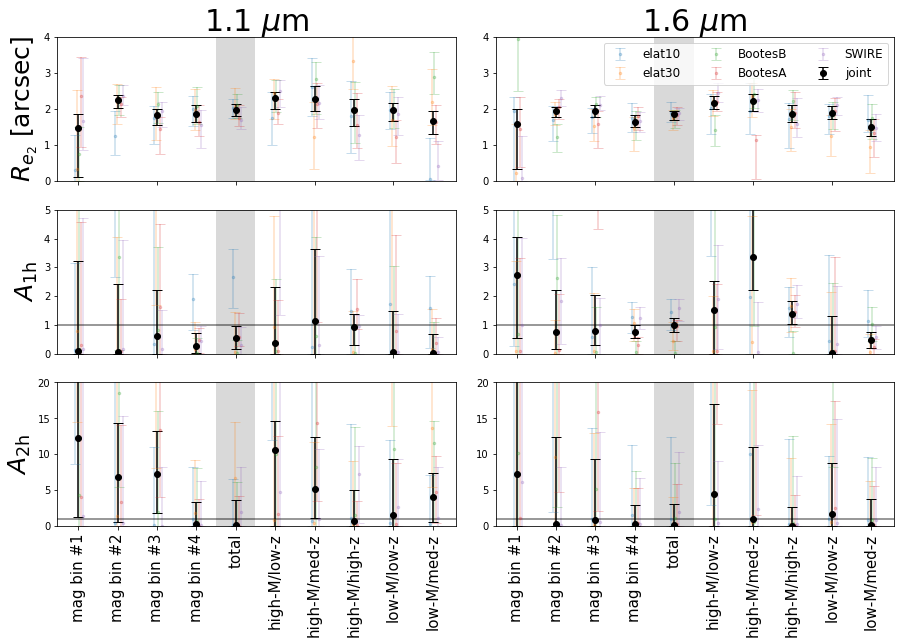

In [33]:
from run_fit import *

ci=68
fig, ax = plt.subplots(3,2, figsize = (15,9))
xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
for j,inst in enumerate([1,2]):
    ax[1][j].axhline(1, c='k',lw=2, ls='-',alpha=0.4)
    ax[2][j].axhline(1, c='k',lw=2, ls='-',alpha=0.4)
    for ifield,c in zip([4,5,6,7,8,None],['C0','C1','C2','C3','C4','k']):
        xoff = 0 if ifield is None else (ifield-5.5)*0.05
        alpha = 1 if ifield is None else 0.25
        msize = 12 if ifield is None else 5
        fieldname = 'joint' if ifield is None else fieldnamedict[ifield]
        
        for i,(im,xpos) in enumerate(zip([0,1,2,3,None],[0,1,2,3,4])):
            subsub = True if im==0 else False
            label = fieldname if im is None else None
            
            if im is None:
                m_min ,m_max = 17, 20
                if ifield is None:
                    savename='mcmc_3par_joint_m17_20.npy'
                else:
                    savename='mcmc_3par_%s_m17_20.npy'%(fieldnamedict[ifield])
                fitparamdat = get_mcmc_fit_params_3par(inst, 3, ifield=ifield,savename=savename, ci=ci)
                fitparamdat95 = get_mcmc_fit_params_3par(inst, 3, ifield=ifield,savename=savename, ci=95)

            else:
                m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
                fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield, subsub=subsub, ci=ci)
                fitparamdat95 = get_mcmc_fit_params_3par(inst,im, ifield=ifield, subsub=subsub, ci=95)

            ax[0][j].errorbar([xpos+xoff], [fitparamdat['Re2']],
                              [[fitparamdat['Re2'] - fitparamdat['Re2_low']],
                               [fitparamdat['Re2_high'] - fitparamdat['Re2']]],
                          fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha,label=label)
            ax[1][j].errorbar([xpos+xoff], [fitparamdat['A1h']],
                              [[fitparamdat['A1h'] - fitparamdat['A1h_low']],
                               [fitparamdat['A1h_high'] - fitparamdat['A1h']]],
                          fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha,label=label)
            ax[2][j].errorbar([xpos+xoff], [fitparamdat['A2h']],
                              [[fitparamdat['A2h'] - fitparamdat['A2h_low']],
                               [fitparamdat['A2h_high'] - fitparamdat['A2h']]],
                          fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha,label=label)
            
            if ifield==None:
                print('(mag bin) inst=%d, #'%(inst),im)

                if fitparamdat95['Re2_low']==0:
                    print('Re2 < %.2f'%fitparamdat95['Re2_high'])
                else:
                    print('Re2=%.2f+%.2f-%.2f'%(fitparamdat['Re2'],
                                                fitparamdat['Re2_high']-fitparamdat['Re2'],
                                                fitparamdat['Re2']-fitparamdat['Re2_low']))
                if fitparamdat95['A1h_low']==0:
                    print('A1h < %.2f'%fitparamdat95['A1h_high'])
                else:
                    print('A1h=%.2f+%.2f-%.2f'%(fitparamdat['A1h'],
                                                fitparamdat['A1h_high']-fitparamdat['A1h'],
                                                fitparamdat['A1h']-fitparamdat['A1h_low']))
                if fitparamdat95['A2h_low']==0:
                    print('A2h < %.2f'%fitparamdat95['A2h_high'])
                else:
                    print('A2h=%.2f+%.2f-%.2f'%(fitparamdat['A2h'],
                                                fitparamdat['A2h_high']-fitparamdat['A2h'],
                                                fitparamdat['A2h']-fitparamdat['A2h_low']))
                    
                print('========')

        for i,(im,M_min,M_max,xpos) in enumerate(zip([1,2,3,2,3],
                                                [-23,-23,-23,-22,-22],
                                                [-22,-22,-22,-21,-21],
                                                [5,6,7,8,9])):
            m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
            if ifield is None:
                savename='mcmc_3par_joint_m%d_%d_Mabs%d_%d.npy'%(m_min,m_max,M_min,M_max)
            else:
                savename='mcmc_3par_%s_m%d_%d_Mabs%d_%d.npy'%(fieldnamedict[ifield],
                                                              m_min,m_max,M_min,M_max)
            fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield,savename=savename, ci=ci)
            fitparamdat95 = get_mcmc_fit_params_3par(inst,im, ifield=ifield,savename=savename, ci=95)
            
            ax[0][j].errorbar([xpos+xoff], [fitparamdat['Re2']],
                              [[fitparamdat['Re2'] - fitparamdat['Re2_low']],
                               [fitparamdat['Re2_high'] - fitparamdat['Re2']]],
                          fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)
            ax[1][j].errorbar([xpos+xoff], [fitparamdat['A1h']],
                              [[fitparamdat['A1h'] - fitparamdat['A1h_low']],
                               [fitparamdat['A1h_high'] - fitparamdat['A1h']]],
                          fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)
            ax[2][j].errorbar([xpos+xoff], [fitparamdat['A2h']],
                              [[fitparamdat['A2h'] - fitparamdat['A2h_low']],
                               [fitparamdat['A2h_high'] - fitparamdat['A2h']]],
                          fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)

            if ifield==None:
                print('(m+M bin) inst=%d, #'%(inst),i)

                if fitparamdat95['Re2_low']==0:
                    print('Re2 < %.2f'%fitparamdat95['Re2_high'])
                else:
                    print('Re2=%.2f+%.2f-%.2f'%(fitparamdat['Re2'],
                                                fitparamdat['Re2_high']-fitparamdat['Re2'],
                                                fitparamdat['Re2']-fitparamdat['Re2_low']))
                if fitparamdat95['A1h_low']==0:
                    print('A1h < %.2f'%fitparamdat95['A1h_high'])
                else:
                    print('A1h=%.2f+%.2f-%.2f'%(fitparamdat['A1h'],
                                                fitparamdat['A1h_high']-fitparamdat['A1h'],
                                                fitparamdat['A1h']-fitparamdat['A1h_low']))
                if fitparamdat95['A2h_low']==0:
                    print('A2h < %.2f'%fitparamdat95['A2h_high'])
                else:
                    print('A2h=%.2f+%.2f-%.2f'%(fitparamdat['A2h'],
                                                fitparamdat['A2h_high']-fitparamdat['A2h'],
                                                fitparamdat['A2h']-fitparamdat['A2h_low']))
                    
                print('========')

    ax[0][j].axvspan(3.5, 4.5, alpha=0.15, facecolor='k')
    ax[1][j].axvspan(3.5, 4.5, alpha=0.15, facecolor='k')
    ax[2][j].axvspan(3.5, 4.5, alpha=0.15, facecolor='k')

    ax[0][j].set_ylim([0,4])
    ax[1][j].set_ylim([0,5])
    ax[2][j].set_ylim([0,2e1])
ax[0][0].set_ylabel(r"$R_{e_2}$ [arcsec]", fontsize=25)
ax[1][0].set_ylabel(r"$A_{\rm 1h}$", fontsize=25)
ax[2][0].set_ylabel(r"$A_{\rm 2h}$", fontsize=25)
ax[0][1].legend(loc=1,fontsize=12,ncol=3)
ax[0][1].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][1].set_xticklabels([])
ax[0][0].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[2][0].set_xticklabels([])
names = ['mag bin #1', 'mag bin #2', 'mag bin #3', 'mag bin #4', 'total',
        'high-M/low-z', 'high-M/med-z', 'high-M/high-z', 'low-M/low-z', 'low-M/med-z']
ax[-1][0].set_xticks(np.arange(10))
ax[-1][1].set_xticks(np.arange(10))
ax[-1][0].set_xticklabels(names,rotation = 90, fontsize=15)
ax[-1][1].set_xticklabels(names,rotation = 90, fontsize=15)
ax[0][0].set_title(r'1.1 $\mu$m', fontsize=30)
ax[0][1].set_title(r'1.6 $\mu$m', fontsize=30)
plt.subplots_adjust(wspace=0.1)

plt.savefig('plots/paperfig/params_best%d.pdf'%ci, dpi = 150, bbox_inches='tight')

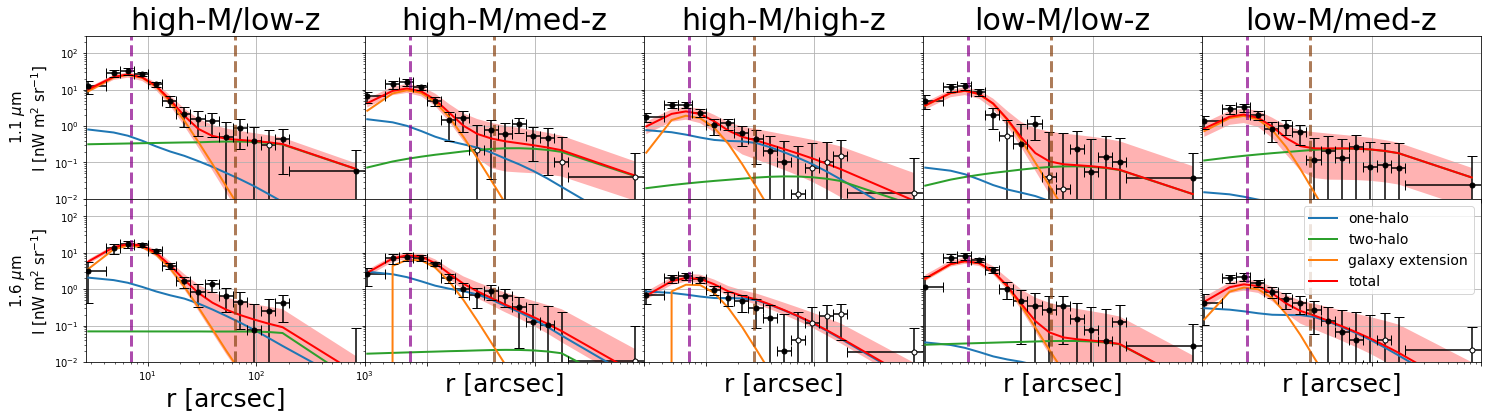

In [32]:
from run_fit import *

fig, ax = plt.subplots(2, 5, figsize = (25,6))

for inst in [1,2]:
    for i,(im,M_min,M_max,R200,name) in enumerate(zip([1,2,3,2,3],
                                            [-23,-23,-23,-22,-22],
                                            [-22,-22,-22,-21,-21],
                                            [64,42,28,41,27],
        ['high-M/low-z','high-M/med-z','high-M/high-z','low-M/low-z','low-M/med-z'])):
        
        m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
        savename='mcmc_3par_joint_m%d_%d_Mabs%d_%d.npy'%(m_min,m_max,M_min,M_max)
        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=None,savename=savename)
        
        Re2, A1h, A2h = fitparamdat['Re2'], fitparamdat['A1h'], fitparamdat['A2h']
        Re2_low, A1h_low, A2h_low \
        = fitparamdat['Re2_low'], fitparamdat['A1h_low'], fitparamdat['A2h_low']
        Re2_high, A1h_high, A2h_high \
        = fitparamdat['Re2_high'], fitparamdat['A1h_high'], fitparamdat['A2h_high']

        profd_arr, profd_err = 0, 0
        profex_arr, profex_arr_low, profex_arr_high = 0, 0, 0
        prof1h_arr, prof1h_arr_low, prof1h_arr_high = 0, 0, 0
        prof2h_arr, prof2h_arr_low, prof2h_arr_high = 0, 0, 0
        for ifield in [4,5,6,7,8]:
            param_fit = fit_stacking_mcmc(inst, ifield, im, m_min, m_max,
                                          Mabs_min=M_min, Mabs_max=M_max)

            profd_arri = param_fit.profex_sub
            profd_erri = np.sqrt(np.diag(param_fit.covsub))
            profd_arr += profd_arri / profd_erri**2
            profd_err += 1 / profd_erri**2

            modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h, fast=False)
            profex_arri = modelprof['profex_sub']
            prof1h_arri = modelprof['prof1h_sub']
            prof2h_arri = modelprof['prof2h_sub']
            profex_arr += profex_arri
            prof1h_arr += prof1h_arri
            prof2h_arr += prof2h_arri

            modelprof = param_fit.get_profexcess_model(Re2=Re2_low, A1h=A1h_low,
                                                       A2h=A2h_low, fast=False)
            profex_arri = modelprof['profex_sub']
            prof1h_arri = modelprof['prof1h_sub']
            prof2h_arri = modelprof['prof2h_sub']
            profex_arr_low += profex_arri
            prof1h_arr_low += prof1h_arri
            prof2h_arr_low += prof2h_arri

            modelprof = param_fit.get_profexcess_model(Re2=Re2_high, A1h=A1h_high,
                                                       A2h=A2h_high, fast=False)
            profex_arri = modelprof['profex_sub']
            prof1h_arri = modelprof['prof1h_sub']
            prof2h_arri = modelprof['prof2h_sub']
            profex_arr_high += profex_arri
            prof1h_arr_high += prof1h_arri
            prof2h_arr_high += prof2h_arri

        profex_arr /= 5
        profex_arr_low /= 5
        profex_arr_high /= 5
        prof1h_arr /= 5
        prof1h_arr_low /= 5
        prof1h_arr_high /= 5
        prof2h_arr /= 5
        prof2h_arr_low /= 5
        prof2h_arr_high /= 5
        profd_arr /= profd_err
        profd_err = np.sqrt(1 / profd_err)

        r_arr = param_fit.rsubbins
        rbinedges = param_fit.rsubbinedges

        ax[inst-1][i].loglog(r_arr, prof1h_arr,'C0', lw=2, label=r'one-halo')
        ax[inst-1][i].loglog(r_arr, prof2h_arr,'C2', lw=2, label=r'two-halo')
        ax[inst-1][i].loglog(r_arr, profex_arr,'C1', lw=2, label=r'galaxy extension')
        ax[inst-1][i].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2, label = 'total')
        ax[inst-1][i].fill_between(r_arr, profex_arr_low + prof1h_arr_low + prof2h_arr_low,
                           profex_arr_high + prof1h_arr_high + prof2h_arr_high, facecolor='r', alpha=0.3)
        plot_err_log(r_arr, 
                     profd_arr,
                     profd_err,
                     xedges = rbinedges,
                     ax=ax[inst-1][i], color='k')

        ax[inst-1][i].set_ylim([1e-2,3e2])
        ax[inst-1][i].set_xlim([2.7,1e3])
        ax[inst-1][i].grid()    
        ax[1][i].set_xlabel('r [arcsec]', fontsize=25)
        ax[0][i].set_title(name, fontsize=30)
        ax[inst-1][i].axvline(R200, c='saddlebrown', lw=3, alpha=0.7,ls='--')
        ax[inst-1][i].axvline(7, c='darkmagenta',lw=3, alpha=0.7,ls='--')

        ax[0][i].tick_params(labelsize=10,labelbottom=False)
        if i!=0:
            ax[inst-1][i].tick_params(labelsize=10,labelbottom=False,labelleft=False)

ax[0][0].set_ylabel(r'1.1 $\mu$m' + '\n' + r'I [nW m$^2$ sr$^{-1}$]', fontsize=15)
ax[1][0].set_ylabel(r'1.6 $\mu$m' + '\n' + r'I [nW m$^2$ sr$^{-1}$]', fontsize=15)
ax[1][-1].legend(fontsize=14)

plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig('plots/paperfig/excess_profile_fit.pdf', dpi = 150, bbox_inches='tight')

***
# Data interpretations

In [1]:
from micecat import *
from run_fit import *
from reduction import *
data_maps = {1: image_reduction(1), 2: image_reduction(2)}

srcinfo = {}
xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
dfmc = get_micecat_df(0, add_Rvir=True)

mrrdata = loadmat(mypaths['ciberdir']+'doc/20170617_Stacking/maps/mrrcats/mrr_cat_SWIRE.mat')
dfmrr = pd.DataFrame()
column_names = ['ra','dec','zm','zme','mst','z','av','ze','npts','mass'] # data['cat'][0].dtype
for i,name in enumerate(column_names):
    dfmrr[name] = mrrdata['cat'][0,0][i].flatten()
dfmrr = dfmrr.loc[dfmrr['mst']>0]
dfmrr = dfmrr.loc[dfmrr['mass']!=0]

for i,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
    m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
    srcinfo[i] = {'im':im, 'm_min':m_min, 'm_max':m_max, 'M_min':M_min, 'M_max':M_max}
    
    dfi = dfmc.loc[(dfmc['I']>=m_min) & (dfmc['I']<m_max) & (dfmc['M_I']>=M_min) & (dfmc['M_I']<M_max)]
    srcinfo[i]['R200_mc'] = 1e3 * dfi['Rv_Mpc'].values # [kpc]
    srcinfo[i]['logMh'] = dfi['lmhalo'].values
    srcinfo[i]['z'] = np.array([])
    for ifield in [4,5,6,7,8]:
        print(i,ifield)
        mask_inst1, mask_inst2 = load_processed_images(data_maps,
                              return_names=[(1,ifield,'mask_inst'),(2,ifield,'mask_inst')])
        field = fieldnamedict[ifield]
        srcdat = ps_src_select(1, ifield, m_min, m_max, [mask_inst1, mask_inst2],
                               Mabs_min=M_min, Mabs_max=M_max, sample_type='all')
        srcinfo[i]['z'] = np.concatenate((srcinfo[i]['z'],np.array(srcdat['zg_arr'])))        
    DA_Mpc = cosmo.angular_diameter_distance(srcinfo[i]['z']).value
    srcinfo[i]['kpc_per_arcsec'] = DA_Mpc * (u.Mpc/u.rad).to(u.kpc/u.arcsec)
    
    # get Mstr from MRR cat
    srcdat = ps_src_select(1, 8, m_min, m_max, 
        [mask_inst1, mask_inst2], sample_type='all')
    dfps = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[8] + '.csv')
    dfps = dfps.iloc[srcdat['idxg_arr']]
    dfps, dfmrr1 = match_catalog_by_coord(dfps,dfmrr)
    dfps['mass'] = dfmrr1['mass'].values
    DM = 5 * np.log10((cosmo.luminosity_distance(dfps['Photz']) / (10 * u.pc)).decompose()).value
    Ms = dfps['I_comb'] - DM + (2.5 * np.log10(1+dfps['Photz']))
    dfps['Mabs'] = Ms
    sp = np.where((dfps['Mabs']>=M_min) & (dfps['Mabs']<M_max))[0]
    logMstr = dfps['mass'].iloc[sp].values
    srcinfo[i]['logMstr'] = logMstr
    
    for inst in [1,2]:
        savename='mcmc_3par_joint_m%d_%d_Mabs%d_%d.npy'%(m_min,m_max,M_min,M_max)
        fitparamdat,flatsamps = get_mcmc_fit_params_3par(inst,im, ifield=ifield,savename=savename,
                                              return_samples=True)
        Re2_samps = (flatsamps[:,0] * fitparamdat['R200'])[::5].reshape(-1,1)
        kpc_per_arcsec = srcinfo[i]['kpc_per_arcsec'].reshape(1,-1)
        Re2_kpc_samps = (Re2_samps@kpc_per_arcsec).flatten()
        srcinfo[i]['Re2_'+str(inst)] = np.median(Re2_kpc_samps)
        srcinfo[i]['Re2_low_'+str(inst)] = np.percentile(Re2_kpc_samps,16)
        srcinfo[i]['Re2_high_'+str(inst)] = np.percentile(Re2_kpc_samps,84)
        srcinfo[i]['Re2_'+str(inst)+'_arcsec'] = fitparamdat['Re2']
        srcinfo[i]['Re2_low_'+str(inst)+'_arcsec'] = fitparamdat['Re2_low']
        srcinfo[i]['Re2_high_'+str(inst)+'_arcsec'] = fitparamdat['Re2_high']
        srcinfo[i]['A1h_'+str(inst)] = fitparamdat['A1h']
        srcinfo[i]['A1h_low_'+str(inst)] = fitparamdat['A1h_low']
        srcinfo[i]['A1h_high_'+str(inst)] = fitparamdat['A1h_high']
        srcinfo[i]['A2h_'+str(inst)] = fitparamdat['A2h']
        srcinfo[i]['A2h_low_'+str(inst)] = fitparamdat['A2h_low']
        srcinfo[i]['A2h_high_'+str(inst)] = fitparamdat['A2h_high']
        
        rbins, mc_avg, mc_std, _ = get_micecat_sim_1h(inst, im, Mhcut=1e14, R200cut=0, zcut=0.15)
        srcinfo[i]['MC1h_rbins'+str(inst)] = rbins
        srcinfo[i]['MC1h_avg'+str(inst)] = mc_avg
        srcinfo[i]['MC1h_std'+str(inst)] = mc_std
        rbins, _, mc_avg_fit, _, _, _ = micecat_profile_fit(inst,im, return_full=True)
        srcinfo[i]['MC2h_rbins'+str(inst)] = rbins
        srcinfo[i]['MC2h_avg'+str(inst)] = mc_avg_fit

# get R50
# for i,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
#     m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
#     srcinfo[i]['dfpetro'] = pd.DataFrame()
#     for ifield in [4,5,6,7,8]:
#         print('get petro mag bin #%d, ifield%d'%(i, ifield))
#         dfpetro = pd.read_csv('/Volumes/Drive/ciber/data/SDSScats/%s_petro.csv'\
#                       %fieldnamedict[ifield],skiprows=1, low_memory=False)
#         mask_inst1, mask_inst2 = load_processed_images(data_maps,
#                               return_names=[(1,ifield,'mask_inst'),(2,ifield,'mask_inst')])
#         field = fieldnamedict[ifield]
#         srcdat = ps_src_select(1, ifield, m_min, m_max, 
#             [mask_inst1, mask_inst2], Mabs_min=M_min, Mabs_max=M_max, sample_type='all')
#         dfpsi = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[ifield] + '.csv')
#         dfpsi = dfpsi.iloc[srcdat['idxg_arr']]
#         dfpsi, dfpetroi = match_catalog_by_coord(dfpsi,dfpetro)
#         dfpsi=dfpsi.reset_index(drop=True)
#         dfpetroi=dfpetroi.reset_index(drop=True)
#         dfpsi = dfpsi.join(dfpetroi,lsuffix='_ps', rsuffix='_petro')
#         srcinfo[i]['dfpetro'] = pd.concat([srcinfo[i]['dfpetro'], 
#                 dfpsi[['petroR50_u','petroR50_g','petroR50_r','petroR50_i','petroR50_z']]])

clear_output()

/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils.py:187: RuntimeWarning: overflow encountered in power
  I_arr = (10**Ie) * np.exp(-bn*((x_arr/xe)**(1/n)-1))


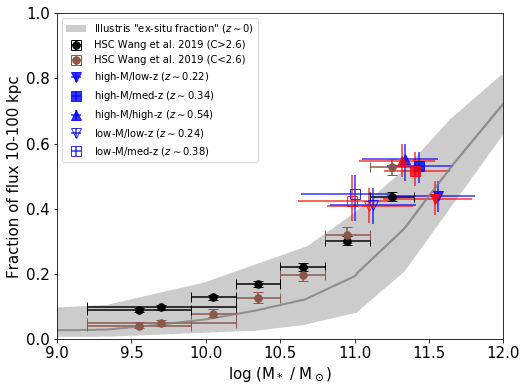

In [9]:
from run_fit import *

r_arr = np.logspace(-1,3,100)
xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
sp = np.where((r_arr > 10) & (r_arr<100))[0]

fig, ax = plt.subplots(1,1,figsize=(8,6))

data = np.loadtxt('Illustris_frac/Illustris_fexsitu_med.txt', delimiter=',')
plt.plot(np.log10(data[:,0]),data[:,1],c='grey',lw=2,alpha=0.8)
data_h = np.loadtxt('Illustris_frac/Illustris_fexsitu_high.txt', delimiter=',')
data_l = np.loadtxt('Illustris_frac/Illustris_fexsitu_low.txt', delimiter=',')
plt.fill_between(np.log10(data[:,0]),
                 np.interp(np.log10(data[:,0]),np.log10(data_l[:,0]),data_l[:,1]),
                 np.interp(np.log10(data[:,0]),np.log10(data_h[:,0]),data_h[:,1]),
                         facecolor='k', alpha=0.2, label='Illustris \"ex-situ fraction\" ($z\sim 0$)')

# Wang+19 table 1
for i,(R200,Mstr_low, Mstr_high) in enumerate(zip([459.08,288.16,214.80,173.18,142.85,114.64,120.76],
                                                  [11.1,10.8,10.5,10.2,9.9,9.2,9.2],
                                                  [11.4,11.1,10.8,10.5,10.2,9.9,10.2])):
    Mstr = (Mstr_low + Mstr_high)/2
    galprofdat_HSC = gal_profile_model().Wang19_profile(r_arr, im, R200=R200)
    galprofdat_HSC3 = gal_profile_model().Wang19_profile(r_arr, im, R200=R200, extendedness=True)
    p_HSC = galprofdat_HSC['I_arr']
    p_HSC3 = galprofdat_HSC3['I_arr']

    galprofdat_HSC = gal_profile_model().Wang19_profile(r_arr, im, R200=R200, xe2= 0.0165 + 0.0008)
    galprofdat_HSC3 = gal_profile_model().Wang19_profile(r_arr, im, R200=R200, extendedness=True,
                                                        xe3=0.0001 + 0.0019, xe2=0.0231+0.0012)
    p_high_HSC = galprofdat_HSC['I_arr']
    p_high_HSC3 = galprofdat_HSC3['I_arr']

    galprofdat_HSC = gal_profile_model().Wang19_profile(r_arr, im, R200=R200, xe2= 0.0165 - 0.0008)
    galprofdat_HSC3 = gal_profile_model().Wang19_profile(r_arr, im, R200=R200, extendedness=True,
                                                        xe3=0,xe2=0.0231-0.0012)
    p_low_HSC  = galprofdat_HSC['I_arr']
    p_low_HSC3 = galprofdat_HSC3['I_arr']

    fHSC = np.sum(p_HSC[sp]*r_arr[sp]**2)/np.sum(p_HSC*r_arr**2)
    f_low_HSC = np.sum(p_low_HSC[sp]*r_arr[sp]**2)/np.sum(p_low_HSC*r_arr**2)
    f_high_HSC = np.sum(p_high_HSC[sp]*r_arr[sp]**2)/np.sum(p_high_HSC*r_arr**2)
    
    
    fHSC3 = np.sum(p_HSC3[sp]*r_arr[sp]**2)/np.sum(p_HSC3*r_arr**2)
    f_low_HSC3 = np.sum(p_low_HSC3[sp]*r_arr[sp]**2)/np.sum(p_low_HSC3*r_arr**2)
    f_high_HSC3 = np.sum(p_high_HSC3[sp]*r_arr[sp]**2)/np.sum(p_high_HSC3*r_arr**2)
    
    if i == 0:
        ax.errorbar([Mstr], [fHSC], xerr=[[Mstr-Mstr_low],[Mstr_high-Mstr]],
                       yerr=[[fHSC - f_high_HSC],[f_low_HSC - fHSC]],
                        fmt='.', capsize=5, markersize=15, c='k', label = 'HSC Wang et al. 2019 (C>2.6)')
        ax.errorbar([Mstr], [fHSC3], xerr=[[Mstr-Mstr_low],[Mstr_high-Mstr]],
                       yerr=[[fHSC3 - f_high_HSC3],[f_low_HSC3 - fHSC3]],
                        fmt='.', capsize=5, markersize=15, c='C5', label = 'HSC Wang et al. 2019 (C<2.6)')
    else:
        ax.errorbar([Mstr], [fHSC], xerr=[[Mstr-Mstr_low],[Mstr_high-Mstr]],
                       yerr=[[fHSC - f_high_HSC],[f_low_HSC - fHSC]],
                        fmt='.', capsize=5, markersize=15, c='k')
        ax.errorbar([Mstr], [fHSC3], xerr=[[Mstr-Mstr_low],[Mstr_high-Mstr]],
                       yerr=[[fHSC3 - f_high_HSC3],[f_low_HSC3 - fHSC3]],
                        fmt='.', capsize=5, markersize=15, c='C5')

for i,(fmt,mfc,name) in enumerate(zip(['v','s','^','v','s'],[None, None, None, 'none', 'none'],
                                        ['high-M/low-z','high-M/med-z','high-M/high-z',
                                         'low-M/low-z','low-M/med-z'])):
    im,m_min, m_max = srcinfo[i]['im'],srcinfo[i]['m_min'],srcinfo[i]['m_max']
    M_min, M_max = srcinfo[i]['M_min'],srcinfo[i]['M_max']    
    
    Mstr = np.median(srcinfo[i]['logMstr'])
    Mstr_low = np.percentile(srcinfo[i]['logMstr'], 16)
    Mstr_high = np.percentile(srcinfo[i]['logMstr'], 84)
    xlabel = '<z> = %.2f, %d < m < %d \n %d < M < %d'\
                      %(np.median(srcinfo[i]['z']),m_min,m_max, M_min, M_max)

    for inst in [1,2]:
        Re2 = srcinfo[i]['Re2_'+str(inst)] 
        Re2_low =srcinfo[i]['Re2_low_'+str(inst)]
        Re2_high = srcinfo[i]['Re2_high_'+str(inst)]

        galprofdat = gal_profile_model().Wang19_profile(r_arr, im, Re2=Re2)
        p = galprofdat['I_arr']

        galprofdat = gal_profile_model().Wang19_profile(r_arr, im, Re2=Re2_high)
        p_high = galprofdat['I_arr']

        galprofdat = gal_profile_model().Wang19_profile(r_arr, im, Re2=Re2_low)
        p_low = galprofdat['I_arr']

        if inst == 1:
            f1 = np.sum(p[sp]*r_arr[sp]**2)/np.sum(p*r_arr**2)
            f1_low = np.sum(p_low[sp]*r_arr[sp]**2)/np.sum(p_low*r_arr**2)
            f1_high = np.sum(p_high[sp]*r_arr[sp]**2)/np.sum(p_high*r_arr**2)
            ax.errorbar([Mstr*1.001], [f1], xerr=[[Mstr-Mstr_low],[Mstr_high-Mstr]],
                           yerr=[[f1 - f1_high],[f1_low - f1]], alpha=0.8,
                            fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='b', 
                        label = name + r' ($z\sim %.2f$)'%np.median(srcinfo[i]['z']))
        else:
            f2 = np.sum(p[sp]*r_arr[sp]**2)/np.sum(p*r_arr**2)
            f2_low = np.sum(p_low[sp]*r_arr[sp]**2)/np.sum(p_low*r_arr**2)
            f2_high = np.sum(p_high[sp]*r_arr[sp]**2)/np.sum(p_high*r_arr**2)
            ax.errorbar([Mstr*0.999], [f2], xerr=[[Mstr-Mstr_low],[Mstr_high-Mstr]],
                           yerr=[[f2 - f1_high],[f2_low - f2]], alpha=0.8,
                        fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='r')
    
    ax.legend(loc=2, fontsize=10)
ax.set_ylim([0,1])
ax.set_xlim([9,12])
ax.set_xlabel('log (M$_*$ / M$_\odot$)', fontsize=15)
ax.set_ylabel("Fraction of flux 10-100 kpc", fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig('plots/paperfig/frac_exsitu.pdf',
            dpi = 200, bbox_inches='tight')

In [10]:
from run_fit import *

data_dict = {}
for inst in [1,2]:
    data_dict[inst] = {}
    for i,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
        m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
        data_dict[inst][i] = {}
        savename='mcmc_3par_joint_m%d_%d_Mabs%d_%d.npy'%(m_min,m_max,M_min,M_max)
        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=None,savename=savename)
        Re2, A1h, A2h = fitparamdat['Re2'], fitparamdat['A1h'], fitparamdat['A2h'],
        Re2_low, A1h_low, A2h_low \
        = fitparamdat['Re2_low'], fitparamdat['A1h_low'], fitparamdat['A2h_low']
        Re2_high, A1h_high, A2h_high \
        = fitparamdat['Re2_high'], fitparamdat['A1h_high'], fitparamdat['A2h_high']

        profgal_arr,profpsf_arr,profgalint_arr = 0,0,0
        profgal_arr_low,profpsf_arr_low,profgalint_arr_low = 0,0,0
        profgal_arr_high,profpsf_arr_high,profgalint_arr_high = 0,0,0

        for ifield in [4,5,6,7,8]:
            print(inst, i, ifield)
            param_fit = fit_stacking_mcmc(1, ifield, im, m_min=m_min, m_max=m_max,
                                         Mabs_min=M_min, Mabs_max=M_max)

            modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
            profgal_arr += modelprof['profgal']
            profpsf_arr += modelprof['profpsf']
            norm_int = param_fit.get_gal_profile_norm(Re2=Re2, A1h=A1h, A2h=A2h)
            profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
            profgalint_arr += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int

            modelprof = param_fit.get_profexcess_model(Re2=Re2_low, A1h=A1h, A2h=A2h)
            profgal_arr_low += modelprof['profgal']
            profpsf_arr_low += modelprof['profpsf']
            norm_int = param_fit.get_gal_profile_norm(Re2=Re2_low, A1h=A1h, A2h=A2h)
            profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
            profgalint_arr_low += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int

            modelprof = param_fit.get_profexcess_model(Re2=Re2_high, A1h=A1h, A2h=A2h)
            profgal_arr_high += modelprof['profgal']
            profpsf_arr_high += modelprof['profpsf']
            norm_int = param_fit.get_gal_profile_norm(Re2=Re2_high, A1h=A1h, A2h=A2h)
            profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
            profgalint_arr_high += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int


        data_dict[inst][i]['profgal_arr'] = profgal_arr / 5
        data_dict[inst][i]['profpsf_arr'] = profpsf_arr / 5
        data_dict[inst][i]['profgalint_arr'] = profgalint_arr / 5

        data_dict[inst][i]['profgal_arr_high'] = profgal_arr_high / 5
        data_dict[inst][i]['profpsf_arr_high'] = profpsf_arr_high / 5
        data_dict[inst][i]['profgalint_arr_high'] = profgalint_arr_high / 5

        data_dict[inst][i]['profgal_arr_low'] = profgal_arr_low / 5
        data_dict[inst][i]['profpsf_arr_low'] = profpsf_arr_low / 5
        data_dict[inst][i]['profgalint_arr_low'] = profgalint_arr_low / 5

        data_dict[inst][i]['profex'] = data_dict[inst][i]['profgal_arr'] - \
                    data_dict[inst][i]['profpsf_arr']
        data_dict[inst][i]['profex_low'] = data_dict[inst][i]['profgal_arr_low'] - \
                    data_dict[inst][i]['profpsf_arr_low']
        data_dict[inst][i]['profex_high'] = data_dict[inst][i]['profgal_arr_high'] - \
                    data_dict[inst][i]['profpsf_arr_high']

        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        data_dict[inst][i]['prof1h'] = modelprof['prof1h']
        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h_low, A2h=A2h)
        data_dict[inst][i]['prof1h_low'] = modelprof['prof1h']
        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h_high, A2h=A2h)
        data_dict[inst][i]['prof1h_high'] = modelprof['prof1h']

    data_dict['rbins'] = param_fit.rbins
    data_dict['rbinedges'] = param_fit.rbinedges

clear_output()

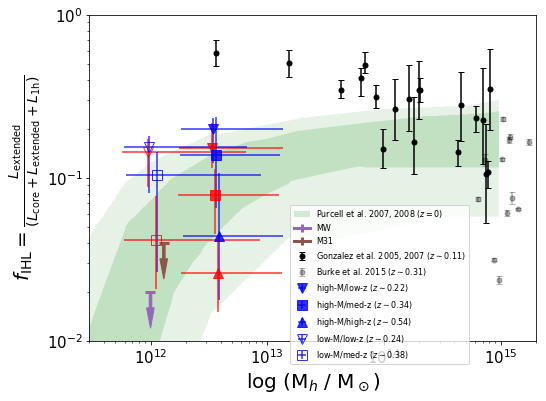

In [11]:
# from run_fit import *

fig, ax = plt.subplots(1,1,figsize=(8,6))

# Purcell
data = np.loadtxt('Illustris_frac/Purcell08_med.txt', delimiter=',')
data_h = np.loadtxt('Illustris_frac/Purcell08_68high.txt', delimiter=',')
data_l = np.loadtxt('Illustris_frac/Purcell08_68low.txt', delimiter=',')
plt.fill_between(10**data[:,0],
                 10**np.interp(data[:,0],data_l[:,0],data_l[:,1]),
                 10**np.interp(data[:,0],data_h[:,0],data_h[:,1]),
                         facecolor='g', alpha=0.15, label=r'Purcell et al. 2007, 2008 ($z=0$)')
data_h = np.loadtxt('Illustris_frac/Purcell08_95high.txt', delimiter=',')
data_l = np.loadtxt('Illustris_frac/Purcell08_95low.txt', delimiter=',')
plt.fill_between(10**data[:,0],
                 10**np.interp(data[:,0],data_l[:,0],data_l[:,1]),
                 10**np.interp(data[:,0],data_h[:,0],data_h[:,1]),
                         facecolor='g', alpha=0.1)

# MW, M31
plt.errorbar([1e12], [0.02], xerr=[1e12*0.1], yerr=[0],
             lw=3, color='C4', label='MW')
plt.errorbar([1.3e12], [0.04], xerr=[1.3e12*0.1], yerr=[0],
             lw=3, color='C5', label='M31')
plt.arrow(1e12, 0.02, 0, -0.02*0.4, width=0.5e11, length_includes_head=True, color='C4', 
         head_width=1.5e11, head_length=0.02*0.2, overhang=0)
plt.arrow(1.3e12, 0.04, 0, -0.04*0.4, width=0.5e11*1.3, length_includes_head=True, color='C5', 
         head_width=1.5e11*1.3, head_length=0.04*0.2, overhang=0)
 
# Gonzalez
Mh_arr,f_arr,f_low_arr, f_high_arr,z_arr = [],[],[],[],[]
for name,arr in Gonzalez_dict.items():
    z_arr.append(arr[0])
    Mh_arr.append(10**arr[1])
    L_BCGICL_L_tot = arr[5]
    L_ICL_L_BCGICL = 10**(-(arr[10] - arr[7])/2.5)
    f_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)
    
    L_BCGICL_L_tot = arr[5] - arr[6]
    L_ICL_L_BCGICL = 10**(-((arr[10]+arr[11]+arr[12]) - arr[7])/2.5)
    f_low_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)
    
    L_BCGICL_L_tot = arr[5] + arr[6]
    L_ICL_L_BCGICL = 10**(-((arr[10]-arr[11]-arr[13]) - arr[7])/2.5)
    f_high_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)

f_arr,f_low_arr, f_high_arr = np.array(f_arr),np.array(f_low_arr), np.array(f_high_arr)
plt.errorbar(Mh_arr, f_arr, yerr=[f_arr - f_low_arr,f_high_arr - f_arr], 
                            fmt='.',capsize=3, mfc=None, markersize=10, color='k',
            label='Gonzalez et al. 2005, 2007 '+r'($z\sim %.2f$)'%(np.median(z_arr)))
# Burke
plt.errorbar(Burke_dict['M200'], Burke_dict['f_ICL'], yerr=Burke_dict['f_ICL_err'], 
                fmt='.',capsize=3, mfc=None, markersize=10, color='k', alpha=0.3,
             label='Burke et al. 2015 '+r'($z\sim %.2f$)'%(np.median(Burke_dict['z'])))


r_arr = data_dict['rbins']
for i,(fmt,mfc,name) in enumerate(zip(['v','s','^','v','s'],[None, None, None, 'none', 'none'],
                                        ['high-M/low-z','high-M/med-z','high-M/high-z',
                                         'low-M/low-z','low-M/med-z'])):
    im,m_min, m_max = srcinfo[i]['im'],srcinfo[i]['m_min'],srcinfo[i]['m_max']
    M_min, M_max = srcinfo[i]['M_min'],srcinfo[i]['M_max']    
    
    Mh = 10**np.median(srcinfo[i]['logMh'])
    Mh_low = 10**np.percentile(srcinfo[i]['logMh'], 16)
    Mh_high = 10**np.percentile(srcinfo[i]['logMh'], 84)

    for inst in [1,2]:
        Ltot = np.sum((data_dict[inst][i]['profgal_arr']+data_dict[inst][i]['prof1h'])*r_arr**2)
        Lihl =  np.sum(data_dict[inst][i]['profex']*r_arr**2)
        Ltot_low = np.sum((data_dict[inst][i]['profgal_arr_low']+\
                           data_dict[inst][i]['prof1h_high'])*r_arr**2)
        Lihl_low =  np.sum(data_dict[inst][i]['profex_low']*r_arr**2)
        Ltot_high = np.sum((data_dict[inst][i]['profgal_arr_high']+\
                            data_dict[inst][i]['prof1h_low'])*r_arr**2)
        Lihl_high =  np.sum(data_dict[inst][i]['profex_high']*r_arr**2)
        f = Lihl/Ltot
        f_low = Lihl_low/Ltot_low
        f_high = Lihl_high/Ltot_high

        if inst == 1:
            
            ax.errorbar([Mh*1.01], [f], xerr=[[Mh-Mh_low],[Mh_high-Mh]],
                           yerr=[[f - f_low],[f_high - f]], alpha=0.8,
                            fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='b', 
                        label = name + r' ($z\sim %.2f$)'%np.median(srcinfo[i]['z']))
        else:
            ax.errorbar([Mh*0.99], [f], xerr=[[Mh-Mh_low],[Mh_high-Mh]],
                           yerr=[[f - f_low],[f_high - f]], alpha=0.8,
                    fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='r')
            
ax.legend(fontsize=8, bbox_to_anchor=(0.65,0.43))
ax.set_ylim([1e-2,1])
ax.set_xlim([3e11,2e15])
ax.set_xscale('log')
ax.set_yscale('log')
# ax.grid()
ax.set_xlabel('log (M$_h$ / M$_\odot$)', fontsize=20)
ax.set_ylabel(r"$f_{\rm IHL} = \frac{L_{\rm extended}}{(L_{\rm core}+L_{\rm extended}+L_{\rm 1h})}$",
              fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig('plots/paperfig/fIHL.pdf',
            dpi = 200, bbox_inches='tight')

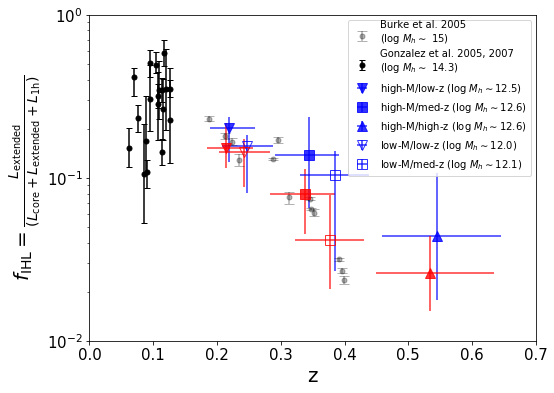

In [12]:
from run_fit import *

fig, ax = plt.subplots(1,1,figsize=(8,6))

# Burke
plt.errorbar(Burke_dict['z'], Burke_dict['f_ICL'], Burke_dict['f_ICL_err'],fmt='.',
             capsize=5, mfc=None, markersize=10, color='k', alpha=0.3, 
             label='Burke et al. 2005\n' + r'(log $M_h\sim$ 15)')

# Gonzalez
z_arr,Mh_arr,f_arr,f_low_arr, f_high_arr = [],[],[],[],[]
for name,arr in Gonzalez_dict.items():
    z_arr.append(arr[0])
    Mh_arr.append(10**arr[1])
    L_BCGICL_L_tot = arr[5]
    L_ICL_L_BCGICL = 10**(-(arr[10] - arr[7])/2.5)
    f_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)
    
    L_BCGICL_L_tot = arr[5] - arr[6]
    L_ICL_L_BCGICL = 10**(-((arr[10]+arr[11]+arr[12]) - arr[7])/2.5)
    f_low_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)
    
    L_BCGICL_L_tot = arr[5] + arr[6]
    L_ICL_L_BCGICL = 10**(-((arr[10]-arr[11]-arr[13]) - arr[7])/2.5)
    f_high_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)

f_arr,f_low_arr, f_high_arr = np.array(f_arr),np.array(f_low_arr), np.array(f_high_arr)
plt.errorbar(z_arr, f_arr, yerr=[f_arr - f_low_arr,f_high_arr - f_arr], 
                            fmt='.',capsize=3, mfc=None, markersize=10, color='k',
            label='Gonzalez et al. 2005, 2007\n'+r'(log $M_h\sim$ %.1f)'%(np.median(np.log10(Mh_arr))))


# # Illustris f_exsitu Rodriguez-Gomez
# data = np.loadtxt('Illustris_frac/Illustris_fexsitu_z_M11_med.txt', delimiter=',')
# data_h = np.loadtxt('Illustris_frac/Illustris_fexsitu_z_M11_high.txt', delimiter=',')
# data_l = np.loadtxt('Illustris_frac/Illustris_fexsitu_z_M11_low.txt', delimiter=',')
# plt.fill_between(np.arange(0,1,0.01),
#                  np.interp(np.arange(0,1,0.01),10**data_l[:,0]-1,10**data_l[:,1]),
#                  np.interp(np.arange(0,1,0.01),10**data_h[:,0]-1,10**data_h[:,1]),
#     facecolor='g', alpha=0.2, label='Rodriguez-Gomez et al. 2016\n'+\
#                  r'(log $M_*\sim$ 11)')

# data = np.loadtxt('Illustris_frac/Illustris_fexsitu_z_M12_med.txt', delimiter=',')
# data_h = np.loadtxt('Illustris_frac/Illustris_fexsitu_z_M12_high.txt', delimiter=',')
# data_l = np.loadtxt('Illustris_frac/Illustris_fexsitu_z_M12_low.txt', delimiter=',')
# plt.fill_between(np.arange(0,1,0.01),
#                  np.interp(np.arange(0,1,0.01),10**data_l[:,0]-1,10**data_l[:,1]),
#                  np.interp(np.arange(0,1,0.01),10**data_h[:,0]-1,10**data_h[:,1]),
#     facecolor='C5', alpha=0.2, label='Rodriguez-Gomez et al. 2016\n'+\
#                  r'(log $M_*\sim$ 12)')

r_arr = data_dict['rbins']
for i,(fmt,mfc,name) in enumerate(zip(['v','s','^','v','s'],[None, None, None, 'none', 'none'],
                                        ['high-M/low-z','high-M/med-z','high-M/high-z',
                                         'low-M/low-z','low-M/med-z'])):
    im,m_min, m_max = srcinfo[i]['im'],srcinfo[i]['m_min'],srcinfo[i]['m_max']
    M_min, M_max = srcinfo[i]['M_min'],srcinfo[i]['M_max']    
    
    
    z = np.median(srcinfo[i]['z'])
    z_low = np.percentile(srcinfo[i]['z'], 16)
    z_high = np.percentile(srcinfo[i]['z'], 84)
    
    Mh = 10**np.median(srcinfo[i]['logMh'])
   
    for inst in [1,2]:
        Ltot = np.sum((data_dict[inst][i]['profgal_arr']+data_dict[inst][i]['prof1h'])*r_arr**2)
        Lihl =  np.sum(data_dict[inst][i]['profex']*r_arr**2)
        Ltot_low = np.sum((data_dict[inst][i]['profgal_arr_low']+\
                           data_dict[inst][i]['prof1h_high'])*r_arr**2)
        Lihl_low =  np.sum(data_dict[inst][i]['profex_low']*r_arr**2)
        Ltot_high = np.sum((data_dict[inst][i]['profgal_arr_high']+\
                            data_dict[inst][i]['prof1h_low'])*r_arr**2)
        Lihl_high =  np.sum(data_dict[inst][i]['profex_high']*r_arr**2)
        f = Lihl/Ltot
        f_low = Lihl_low/Ltot_low
        f_high = Lihl_high/Ltot_high

        if inst == 1:
            
            ax.errorbar([z*1.01], [f], xerr=[[z-z_low],[z_high-z]],
                           yerr=[[f - f_low],[f_high - f]], alpha=0.8,
                            fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='b', 
                        label = name + r' (log $M_h\sim %.1f$)'%np.log10(Mh))
        else:
            ax.errorbar([z*0.99], [f], xerr=[[z-z_low],[z_high-z]],
                           yerr=[[f - f_low],[f_high - f]], alpha=0.8,
                    fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='r')
            
ax.legend(fontsize=10, loc=1)#bbox_to_anchor=(1,1))
ax.set_ylim([0,1])
ax.set_yscale('log')
ax.set_ylim([1e-2,1e0])

ax.set_xlim([0,0.7])
ax.set_xlabel('z', fontsize=20)
ax.set_ylabel(r"$f_{\rm IHL} = \frac{L_{\rm extended}}{(L_{\rm core}+L_{\rm extended}+L_{\rm 1h})}$",
              fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig('plots/paperfig/fIHL_z.pdf',
            dpi = 200, bbox_inches='tight')

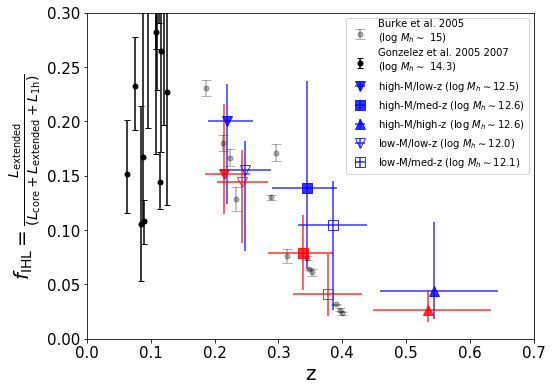

In [36]:
from run_fit import *

fig, ax = plt.subplots(1,1,figsize=(8,6))

# Burke
plt.errorbar(Burke_dict['z'], Burke_dict['f_ICL'], Burke_dict['f_ICL_err'],fmt='.',
             capsize=5, mfc=None, markersize=10, color='k', alpha=0.3, 
             label='Burke et al. 2005\n' + r'(log $M_h\sim$ 15)')

# Gonzalez
z_arr,Mh_arr,f_arr,f_low_arr, f_high_arr = [],[],[],[],[]
for name,arr in Gonzalez_dict.items():
    z_arr.append(arr[0])
    Mh_arr.append(10**arr[1])
    L_BCGICL_L_tot = arr[5]
    L_ICL_L_BCGICL = 10**(-(arr[10] - arr[7])/2.5)
    f_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)
    
    L_BCGICL_L_tot = arr[5] - arr[6]
    L_ICL_L_BCGICL = 10**(-((arr[10]+arr[11]+arr[12]) - arr[7])/2.5)
    f_low_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)
    
    L_BCGICL_L_tot = arr[5] + arr[6]
    L_ICL_L_BCGICL = 10**(-((arr[10]-arr[11]-arr[13]) - arr[7])/2.5)
    f_high_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)

f_arr,f_low_arr, f_high_arr = np.array(f_arr),np.array(f_low_arr), np.array(f_high_arr)
plt.errorbar(z_arr, f_arr, yerr=[f_arr - f_low_arr,f_high_arr - f_arr], 
                            fmt='.',capsize=3, mfc=None, markersize=10, color='k',
            label='Gonzelez et al. 2005 2007\n'+r'(log $M_h\sim$ %.1f)'%(np.median(np.log10(Mh_arr))))

r_arr = data_dict['rbins']
for i,(fmt,mfc,name) in enumerate(zip(['v','s','^','v','s'],[None, None, None, 'none', 'none'],
                                        ['high-M/low-z','high-M/med-z','high-M/high-z',
                                         'low-M/low-z','low-M/med-z'])):
    im,m_min, m_max = srcinfo[i]['im'],srcinfo[i]['m_min'],srcinfo[i]['m_max']
    M_min, M_max = srcinfo[i]['M_min'],srcinfo[i]['M_max']    
    
    
    z = np.median(srcinfo[i]['z'])
    z_low = np.percentile(srcinfo[i]['z'], 16)
    z_high = np.percentile(srcinfo[i]['z'], 84)
    
    Mh = 10**np.median(srcinfo[i]['logMh'])
   
    for inst in [1,2]:
        Ltot = np.sum((data_dict[inst][i]['profgal_arr']+data_dict[inst][i]['prof1h'])*r_arr**2)
        Lihl =  np.sum(data_dict[inst][i]['profex']*r_arr**2)
        Ltot_low = np.sum((data_dict[inst][i]['profgal_arr_low']+\
                           data_dict[inst][i]['prof1h_high'])*r_arr**2)
        Lihl_low =  np.sum(data_dict[inst][i]['profex_low']*r_arr**2)
        Ltot_high = np.sum((data_dict[inst][i]['profgal_arr_high']+\
                            data_dict[inst][i]['prof1h_low'])*r_arr**2)
        Lihl_high =  np.sum(data_dict[inst][i]['profex_high']*r_arr**2)
        f = Lihl/Ltot
        f_low = Lihl_low/Ltot_low
        f_high = Lihl_high/Ltot_high

        if inst == 1:
            
            ax.errorbar([z*1.01], [f], xerr=[[z-z_low],[z_high-z]],
                           yerr=[[f - f_low],[f_high - f]], alpha=0.8,
                            fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='b', 
                        label = name + r' (log $M_h\sim %.1f$)'%np.log10(Mh))
        else:
            ax.errorbar([z*0.99], [f], xerr=[[z-z_low],[z_high-z]],
                           yerr=[[f - f_low],[f_high - f]], alpha=0.8,
                    fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='r')
            
ax.legend(fontsize=10, loc=1)
ax.set_ylim([0,0.3])
ax.set_xlim([0,0.7])
ax.set_xlabel('z', fontsize=20)
ax.set_ylabel(r"$f_{\rm IHL} = \frac{L_{\rm extended}}{(L_{\rm core}+L_{\rm extended}+L_{\rm 1h})}$",
              fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig('plots/paperfig/fIHL_z.pdf',
            dpi = 200, bbox_inches='tight')

## Core vs Extended Color

In [59]:
from run_fit import *

data = {}
for i,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
    m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
    data[i] = {}
    savename='mcmc_3par_joint_m%d_%d_Mabs%d_%d.npy'%(m_min,m_max,M_min,M_max)
    fitparamdat = get_mcmc_fit_params_3par(1,im, ifield=None,savename=savename)
    Re2, A1h, A2h = fitparamdat['Re2'], fitparamdat['A1h'], fitparamdat['A2h'],
    Re2_low, A1h_low, A2h_low \
    = fitparamdat['Re2_low'], fitparamdat['A1h_low'], fitparamdat['A2h_low']
    Re2_high, A1h_high, A2h_high \
    = fitparamdat['Re2_high'], fitparamdat['A1h_high'], fitparamdat['A2h_high']

    profgal_arr1,profpsf_arr1,profgalint_arr1 = 0,0,0
    profgal_arr2,profpsf_arr2,profgalint_arr2 = 0,0,0
    profgal_arr1_low,profpsf_arr1_low,profgalint_arr1_low = 0,0,0
    profgal_arr2_low,profpsf_arr2_low,profgalint_arr2_low = 0,0,0
    profgal_arr1_high,profpsf_arr1_high,profgalint_arr1_high = 0,0,0
    profgal_arr2_high,profpsf_arr2_high,profgalint_arr2_high = 0,0,0

    for ifield in [4,5,6,7,8]:
        param_fit = fit_stacking_mcmc(1, ifield, im, m_min=m_min, m_max=m_max,
                                     Mabs_min=M_min, Mabs_max=M_max)

        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        profgal_arr1 += modelprof['profgal']
        profpsf_arr1 += modelprof['profpsf']
        norm_int = param_fit.get_gal_profile_norm(Re2=Re2, A1h=A1h, A2h=A2h)
        profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
        profgalint_arr1 += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int

        modelprof = param_fit.get_profexcess_model(Re2=Re2_low, A1h=A1h, A2h=A2h)
        profgal_arr1_low += modelprof['profgal']
        profpsf_arr1_low += modelprof['profpsf']
        norm_int = param_fit.get_gal_profile_norm(Re2=Re2_low, A1h=A1h, A2h=A2h)
        profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
        profgalint_arr1_low += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int
        
        modelprof = param_fit.get_profexcess_model(Re2=Re2_high, A1h=A1h, A2h=A2h)
        profgal_arr1_high += modelprof['profgal']
        profpsf_arr1_high += modelprof['profpsf']
        norm_int = param_fit.get_gal_profile_norm(Re2=Re2_high, A1h=A1h, A2h=A2h)
        profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
        profgalint_arr1_high += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int
        

        fitparamdat = get_mcmc_fit_params_3par(2, im, ifield=None,savename=savename)
        Re2, A1h, A2h = fitparamdat['Re2'], fitparamdat['A1h'], fitparamdat['A2h']
        param_fit = fit_stacking_mcmc(2, ifield, im, m_min=m_min, m_max=m_max,
                                     Mabs_min=M_min, Mabs_max=M_max)
        
        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        profgal_arr2 += modelprof['profgal']
        profpsf_arr2 += modelprof['profpsf']
        norm_int = param_fit.get_gal_profile_norm(Re2=Re2, A1h=A1h, A2h=A2h)
        profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
        profgalint_arr2 += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int

        modelprof = param_fit.get_profexcess_model(Re2=Re2_low, A1h=A1h, A2h=A2h)
        profgal_arr2_low += modelprof['profgal']
        profpsf_arr2_low += modelprof['profpsf']
        norm_int = param_fit.get_gal_profile_norm(Re2=Re2_low, A1h=A1h, A2h=A2h)
        profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
        profgalint_arr2_low += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int
        
        modelprof = param_fit.get_profexcess_model(Re2=Re2_high, A1h=A1h, A2h=A2h)
        profgal_arr2_high += modelprof['profgal']
        profpsf_arr2_high += modelprof['profpsf']
        norm_int = param_fit.get_gal_profile_norm(Re2=Re2_high, A1h=A1h, A2h=A2h)
        profint = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2, A1h=A1h, A2h=A2h)
        profgalint_arr2_high += profint['I_arr']/profint['I_arr'][0] * modelprof['normg'] * norm_int
        
    
    data[i]['profgal_arr1'] = profgal_arr1 / 5
    data[i]['profpsf_arr1'] = profpsf_arr1 / 5
    data[i]['profgalint_arr1'] = profgalint_arr1 / 5
    data[i]['profgal_arr2'] = profgal_arr2 / 5
    data[i]['profpsf_arr2'] = profpsf_arr2 / 5
    data[i]['profgalint_arr2'] = profgalint_arr2 / 5
    
    data[i]['profgal_arr1_high'] = profgal_arr1_high / 5
    data[i]['profpsf_arr1_high'] = profpsf_arr1_high / 5
    data[i]['profgalint_arr1_high'] = profgalint_arr1_high / 5
    data[i]['profgal_arr2_high'] = profgal_arr2_high / 5
    data[i]['profpsf_arr2_high'] = profpsf_arr2_high / 5
    data[i]['profgalint_arr2_high'] = profgalint_arr2_high / 5

    data[i]['profgal_arr1_low'] = profgal_arr1_low / 5
    data[i]['profpsf_arr1_low'] = profpsf_arr1_low / 5
    data[i]['profgalint_arr1_low'] = profgalint_arr1_low / 5
    data[i]['profgal_arr2_low'] = profgal_arr2_low / 5
    data[i]['profpsf_arr2_low'] = profpsf_arr2_low / 5
    data[i]['profgalint_arr2_low'] = profgalint_arr2_low / 5
    
    data[i]['profex1'] = data[i]['profgal_arr1']  - data[i]['profpsf_arr1']
    data[i]['profex2'] = data[i]['profgal_arr2']  - data[i]['profpsf_arr2']
    data[i]['profex1_low'] = data[i]['profgal_arr1_low']  - data[i]['profpsf_arr1_low']
    data[i]['profex2_low'] = data[i]['profgal_arr2_low']  - data[i]['profpsf_arr2_low']
    data[i]['profex1_high'] = data[i]['profgal_arr1_high']  - data[i]['profpsf_arr1_high']
    data[i]['profex2_high'] = data[i]['profgal_arr2_high']  - data[i]['profpsf_arr2_high']

data['rbins'] = param_fit.rbins
data['rbinedges'] = param_fit.rbinedges

In [40]:
for i,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
    m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
    
    SNRnorm1, SNRnorm2 = 0, 0
    for ifield in [4,5,6,7,8]:
        stackdat = stacking(1, ifield, m_min=m_min, m_max=m_max, Mabs_min=M_min, Mabs_max=M_max,
                        load_from_file=True).stackdat
        SNRnorm1 += stackdat['profcb'][0]/np.sqrt(stackdat['cov']['profcb'][0][0])
        stackdat = stacking(2, ifield, m_min=m_min, m_max=m_max, Mabs_min=M_min, Mabs_max=M_max,
                        load_from_file=True).stackdat
        SNRnorm2 += stackdat['profcb'][0]/np.sqrt(stackdat['cov']['profcb'][0][0])
    
    SNRnorm1 /= 5
    SNRnorm2 /= 5

    rbins,rbinedges = data['rbins'], data['rbinedges']
    drs = np.diff(rbinedges)
    
    Fpsf1 = np.sum(data[i]['profpsf_arr1']*2*np.pi*rbins*drs)
    Fpsf1 = Fpsf1 * (u.nW*u.arcsec**2/u.m**2/u.sr)/ (band_info(1).nu * u.GHz)
    m_psf1 = -2.5 * np.log10(Fpsf1.to(u.Jy).value / 3631)
    Fpsf2 = np.sum(data[i]['profpsf_arr2']*2*np.pi*rbins*drs)
    Fpsf2 = Fpsf2 * (u.nW*u.arcsec**2/u.m**2/u.sr)/ (band_info(1).nu * u.GHz)
    m_psf2 = -2.5 * np.log10(Fpsf2.to(u.Jy).value / 3631)

    Fpsf1_low = Fpsf1 * (1-1/SNRnorm1)
    m_psf1_low = -2.5 * np.log10(Fpsf1_low.to(u.Jy).value / 3631)
    Fpsf2_low = Fpsf2 * (1-1/SNRnorm2)
    m_psf2_low = -2.5 * np.log10(Fpsf2_low.to(u.Jy).value / 3631)

    Fpsf1_high = Fpsf1 * (1+1/SNRnorm1)
    m_psf1_high = -2.5 * np.log10(Fpsf1_high.to(u.Jy).value / 3631)
    Fpsf2_high = Fpsf2 * (1+1/SNRnorm2)
    m_psf2_high = -2.5 * np.log10(Fpsf2_high.to(u.Jy).value / 3631)

    Fgal1 = np.sum(data[i]['profgal_arr1']*2*np.pi*rbins*drs)
    Fgal1 = Fgal1 * (u.nW*u.arcsec**2/u.m**2/u.sr)/ (band_info(1).nu * u.GHz)
    m_gal1 = -2.5 * np.log10(Fgal1.to(u.Jy).value / 3631)
    Fgal2 = np.sum(data[i]['profgal_arr2']*2*np.pi*rbins*drs)
    Fgal2 = Fgal2 * (u.nW*u.arcsec**2/u.m**2/u.sr)/ (band_info(1).nu * u.GHz)
    m_gal2 = -2.5 * np.log10(Fgal2.to(u.Jy).value / 3631)

    Fgal1_low = np.sum(data[i]['profgal_arr1_low']*2*np.pi*rbins*drs)
    Fgal1_low = Fgal1_low * (u.nW*u.arcsec**2/u.m**2/u.sr)/ (band_info(1).nu * u.GHz)
    m_gal1_low = -2.5 * np.log10(Fgal1_low.to(u.Jy).value / 3631)
    Fgal2_low = np.sum(data[i]['profgal_arr2_low']*2*np.pi*rbins*drs)
    Fgal2_low = Fgal2_low * (u.nW*u.arcsec**2/u.m**2/u.sr)/ (band_info(1).nu * u.GHz)
    m_gal2_low = -2.5 * np.log10(Fgal2_low.to(u.Jy).value / 3631)

    Fgal1_high = np.sum(data[i]['profgal_arr1_high']*2*np.pi*rbins*drs)
    Fgal1_high = Fgal1_high * (u.nW*u.arcsec**2/u.m**2/u.sr)/ (band_info(1).nu * u.GHz)
    m_gal1_high = -2.5 * np.log10(Fgal1_high.to(u.Jy).value / 3631)
    Fgal2_high = np.sum(data[i]['profgal_arr2_high']*2*np.pi*rbins*drs)
    Fgal2_high = Fgal2_high * (u.nW*u.arcsec**2/u.m**2/u.sr)/ (band_info(1).nu * u.GHz)
    m_gal2_high = -2.5 * np.log10(Fgal2_high.to(u.Jy).value / 3631)

    m_ex1 = -2.5 * np.log10((Fgal1-Fpsf1).to(u.Jy).value / 3631)
    m_ex2 = -2.5 * np.log10((Fgal2-Fpsf2).to(u.Jy).value / 3631)
    m_ex1_high = -2.5 * np.log10((Fgal1_low-Fpsf1).to(u.Jy).value / 3631)
    m_ex2_high = -2.5 * np.log10((Fgal2_low-Fpsf2).to(u.Jy).value / 3631)
    m_ex1_low = -2.5 * np.log10((Fgal1_high-Fpsf1).to(u.Jy).value / 3631)
    m_ex2_low = -2.5 * np.log10((Fgal2_high-Fpsf2).to(u.Jy).value / 3631)
    
    dm_psf = m_psf1 - m_psf2
    dm_psf_low = m_psf1_high - m_psf2_low
    dm_psf_high = m_psf1_low - m_psf2_high
    dm_ex = m_ex1 - m_ex2
    dm_ex_high = m_ex1_high - m_ex2_low
    dm_ex_low = m_ex1_low - m_ex2_high
    
    print('bin #%d, CorePSF (m_1.1 - m_1.6) = %.2f + %.2f - %.2f'\
          %(i,dm_psf, dm_psf_high-dm_psf,  dm_psf-dm_psf_low))
    print('bin #%d, Ext_IHL (m_1.1 - m_1.6) = %.2f + %.2f - %.2f'\
          %(i,dm_ex, dm_psf_high-dm_ex,  dm_psf-dm_ex_low))


dm_ihl = -2.5*np.log10((7.0)/(11.4))
dm_ihl_low = -2.5*np.log10((7.0+4.0)/(11.4-4.8))
dm_ihl_high = -2.5*np.log10((7.0-3.5)/(11.4+5.4))

dm_igl = -2.5*np.log10((9.7)/(9.0))
dm_igl_low = -2.5*np.log10((9.7+3.0)/(9.0-1.7))
dm_igl_high = -2.5*np.log10((9.7-1.9)/(9.0+2.6))

print('IHL (m_1.1 - m_1.6) = %.2f + %.2f - %.2f'\
      %(dm_ihl, dm_ihl_high-dm_ihl, dm_ihl-dm_ihl_low))
print('IGL (m_1.1 - m_1.6) = %.2f + %.2f - %.2f'\
      %(dm_igl, dm_igl_high-dm_ex, dm_igl-dm_ex_low))

bin #0, CorePSF (m_1.1 - m_1.6) = -0.13 + 0.14 - 0.14
bin #0, Ext_IHL (m_1.1 - m_1.6) = -0.36 + 0.37 - 0.51
bin #1, CorePSF (m_1.1 - m_1.6) = -0.02 + 0.15 - 0.15
bin #1, Ext_IHL (m_1.1 - m_1.6) = -0.24 + 0.37 - 0.84
bin #2, CorePSF (m_1.1 - m_1.6) = 0.09 + 0.12 - 0.11
bin #2, Ext_IHL (m_1.1 - m_1.6) = -0.22 + 0.43 - 1.18
bin #3, CorePSF (m_1.1 - m_1.6) = -0.16 + 0.12 - 0.12
bin #3, Ext_IHL (m_1.1 - m_1.6) = -0.36 + 0.31 - 0.64
bin #4, CorePSF (m_1.1 - m_1.6) = -0.01 + 0.10 - 0.10
bin #4, Ext_IHL (m_1.1 - m_1.6) = -0.43 + 0.52 - 1.18
IHL (m_1.1 - m_1.6) = 0.53 + 1.17 - 1.08
IGL (m_1.1 - m_1.6) = -0.08 + 0.87 - 1.11


## frac of light outside SDSS aperture

In [41]:
# from run_fit import *
# # from reduction import *
# # data_maps = {1: image_reduction(1), 2: image_reduction(2)}
# srcinfo = {}
# for i,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
#     m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
#     srcinfo[i] = {'im':im, 'm_min':m_min, 'm_max':m_max, 'M_min':M_min, 'M_max':M_max}
#     srcinfo[i]['df'] = pd.DataFrame()
#     for ifield in [4,5,6,7,8]:
#         dfpetro = pd.read_csv('/Volumes/Drive/ciber/data/SDSScats/%s_petro.csv'\
#                       %fieldnamedict[ifield],skiprows=1, low_memory=False)
#         mask_inst1, mask_inst2 = load_processed_images(data_maps,
#                               return_names=[(1,ifield,'mask_inst'),(2,ifield,'mask_inst')])
#         field = fieldnamedict[ifield]
#         srcdat = ps_src_select(1, ifield, m_min, m_max, 
#             [mask_inst1, mask_inst2], Mabs_min=M_min, Mabs_max=M_max, sample_type='all')
#         dfpsi = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[ifield] + '.csv')
#         dfpsi = dfpsi.iloc[srcdat['idxg_arr']]
#         dfpsi, dfpetroi = match_catalog_by_coord(dfpsi,dfpetro)
#         dfpsi=dfpsi.reset_index(drop=True)
#         dfpetroi=dfpetroi.reset_index(drop=True)
#         dfpsi = dfpsi.join(dfpetroi,lsuffix='_ps', rsuffix='_petro')
#         srcinfo[i]['df'] = pd.concat([srcinfo[i]['df'], dfpsi])

In [48]:
r_arr = np.logspace(-1,3,100)

# f1p_arr = np.zeros([3,5])
# f2p_arr = np.zeros([3,5])
# f1m_arr = np.zeros([3,5])
# f2m_arr = np.zeros([3,5])
# xlabel_arr = []
for i,(im,M_min,M_max,c) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21],
                                         ['#ff0000','#ff5f00','#ffaf87','#0000ff','#0087ff'])):
    m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
#     xlabel_arr.append('%d < m < %d \n %d < M < %d \n'%(m_min,m_max, M_min, M_max))

    df = srcinfo[i]['df']
    rbinedges = np.arange(0.2,10,0.2)
    rbins = (rbinedges[1:] + rbinedges[:-1]) / 2
    rps = df['petroRad_i'].loc[df['petroRad_i']>0]
    F_model_petro = 10**(-(df['r'] - df['petroMag_r'])/2.5)
    
    for inst in [1,2]:
        savename='mcmc_3par_joint_m%d_%d_Mabs%d_%d.npy'%(m_min,m_max,M_min,M_max)
        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=None,savename=savename)
        Re2 = fitparamdat['Re2']
        Re2_low = fitparamdat['Re2_low']
        Re2_high = fitparamdat['Re2_high']

        galprofdat = gal_profile_model().Wang19_profile(r_arr, im, Re2=Re2)
        p = galprofdat['I_arr']
        p = p/np.sum(p*r_arr**2)
        galprofdat = gal_profile_model().Wang19_profile(r_arr, im, Re2=Re2_high)
        p_high = galprofdat['I_arr']
        p_high = p_high/np.sum(p_high*r_arr**2)
        galprofdat = gal_profile_model().Wang19_profile(r_arr, im, Re2=Re2_low)
        p_low = galprofdat['I_arr']
        p_low = p_low/np.sum(p_low*r_arr**2)
        Fpetro = np.array([np.sum(p[r_arr<2*rp]*r_arr[r_arr<2*rp]**2) for rp in rps])
        Fpetro_low = np.array([np.sum(p_low[r_arr<2*rp]*r_arr[r_arr<2*rp]**2) for rp in rps])
        Fpetro_high = np.array([np.sum(p_high[r_arr<2*rp]*r_arr[r_arr<2*rp]**2) for rp in rps])
        Fmodel = Fpetro * F_model_petro
        Fmodel_low = Fpetro_low * F_model_petro
        Fmodel_high = Fpetro_high * F_model_petro        
        
        print('bin #%d, inst%d, petro frac = %.2f + %.2f - %.2f'\
              %(i,inst,np.median(Fpetro),np.percentile(Fpetro_high,84)-np.median(Fpetro),
                np.median(Fpetro)-np.percentile(Fpetro_high,16)))
        print('bin #%d, inst%d, model frac = %.2f + %.2f - %.2f'\
              %(i,inst,np.median(Fmodel),np.percentile(Fmodel_high,84)-np.median(Fmodel),
                np.median(Fmodel)-np.percentile(Fmodel_high,16)))
        print('---')

bin #0, inst1, petro frac = 0.78 + 0.08 - 0.10
bin #0, inst1, model frac = 0.84 + 0.11 - 0.12
---
bin #0, inst2, petro frac = 0.80 + 0.07 - 0.10
bin #0, inst2, model frac = 0.85 + 0.10 - 0.12
---
bin #1, inst1, petro frac = 0.74 + 0.07 - 0.13
bin #1, inst1, model frac = 0.78 + 0.08 - 0.15
---
bin #1, inst2, petro frac = 0.75 + 0.08 - 0.11
bin #1, inst2, model frac = 0.78 + 0.10 - 0.13
---
bin #2, inst1, petro frac = 0.73 + 0.07 - 0.17
bin #2, inst1, model frac = 0.77 + 0.15 - 0.19
---
bin #2, inst2, petro frac = 0.75 + 0.07 - 0.16
bin #2, inst2, model frac = 0.79 + 0.16 - 0.18
---
bin #3, inst1, petro frac = 0.78 + 0.05 - 0.11
bin #3, inst1, model frac = 0.80 + 0.10 - 0.12
---
bin #3, inst2, petro frac = 0.79 + 0.05 - 0.11
bin #3, inst2, model frac = 0.81 + 0.10 - 0.12
---
bin #4, inst1, petro frac = 0.78 + 0.06 - 0.16
bin #4, inst1, model frac = 0.80 + 0.09 - 0.16
---
bin #4, inst2, petro frac = 0.80 + 0.06 - 0.15
bin #4, inst2, model frac = 0.83 + 0.10 - 0.14
---


In [52]:
# pointing misalignment
for ifield in [4,5,6,7,8]:
    catdir = mypaths['PScatdat']
    df = pd.read_csv(catdir + fieldnamedict[ifield] + '.csv')
    x1_arr, y1_arr = np.array(df['y1']), np.array(df['x1'])
    x2_arr, y2_arr = np.array(df['y2']), np.array(df['x2'])

    sp = np.where((x1_arr>-0.5) & (x1_arr<1023.5) & (x2_arr>-0.5) & (x2_arr<1023.5) & \
                 (y1_arr>-0.5) & (y1_arr<1023.5) & (y2_arr>-0.5) & (y2_arr<1023.5))[0]

    x1_arr, y1_arr, x2_arr, y2_arr = x1_arr[sp], y1_arr[sp], x2_arr[sp], y2_arr[sp]
    x2_arr = 1023 - x2_arr

    r_arr = np.sqrt((x1_arr - y2_arr)**2 + (y1_arr - x2_arr)**2)
    print(np.median(r_arr)*7,np.mean(r_arr)*7)

50.671814152085254 50.38428236231464
50.312455967592605 49.5804592102334
46.83022176500473 48.05122653774125
49.21506254662519 49.530726863905755
49.828018282564315 50.29515581397345


***
# Deprecated

Text(0, 0.5, '$\\Delta y$ (arcmin)')

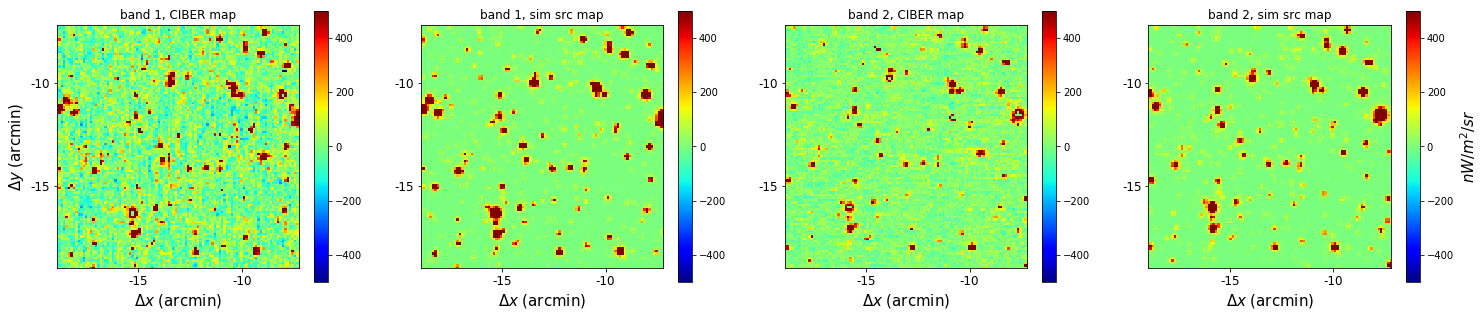

In [9]:
fig, ax = plt.subplots(1, 4, figsize = (25,5))

pixticks1 = np.linspace(0,511.5,13)
pixtick_labels1 = ['-60', '-55', '-50', '-45', '-40', '-35', 
                  '-30', '-25', '-20', '-15', '-10', '-5', '0']

ifield = 8
for inst in [1,2]:
    mask_inst, cbmap, psmap\
    = load_processed_images(data_maps, [(inst,ifield,'mask_inst'),
                                       (inst,ifield,'cbmap'),
                                       (inst,ifield,'psmap')],
                           rotate_TM2=True)
    
    axi = ax[inst*2-2]
    p = imageclip(cbmap*mask_inst, vmin=-500, vmax=500, ax=axi, return_objects=True)
    axi.set_xticks(pixticks1)
    axi.set_xticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks1)
    axi.set_yticklabels(pixtick_labels1, fontsize=12)
    axi.set_title('band %d, CIBER map'%inst)
    axi.set_xlim([350,450])
    axi.set_ylim([350,450])
    

    axi = ax[inst*2-1]
    p = imageclip(psmap, vmin=-500, vmax=500, ax=axi, return_objects=True)
    axi.set_xticks(pixticks1)
    axi.set_xticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks1)
    axi.set_yticklabels(pixtick_labels1, fontsize=12)
    axi.set_title('band %d, sim src map'%inst)
    axi.set_xlim([350,450])
    axi.set_ylim([350,450])

p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
ax[0].set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

# plt.savefig('plots/paperfig/srcmap.png', dpi = 200, bbox_inches='tight')

## Stacked Source Distribution

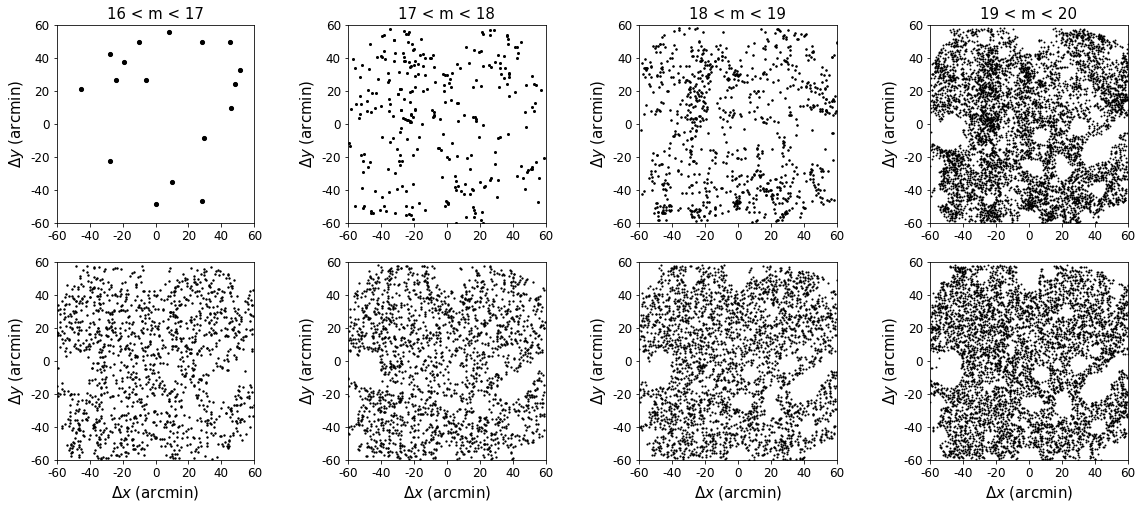

In [38]:
from stack_ancillary import *
# from reduction import *
# data_maps = {1: image_reduction(1), 2: image_reduction(2)}

pixticks = np.linspace(0,1023,7)
pixtick_labels = ['-60', '-40', '-20', '0', '20', '40', '60']

inst = 1
for ifield in [4,5,6,7,8]:
    cbmap, psmap, strmask, strnum, mask_inst1, mask_inst2 = \
    load_processed_images(data_maps, return_names=[(inst,ifield,'cbmap'), 
                                        (inst,ifield,'psmap'),
                                       (inst,ifield,'strmask'), 
                                       (inst,ifield,'strnum'),
                                       (1,ifield,'mask_inst'),
                               (2,ifield,'mask_inst')])
    if inst==1:
        mask_inst = mask_inst1
    else:
        mask_inst = mask_inst2

    plt.close()
    fig, ax = plt.subplots(2, 4, figsize = (20,8))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        srcdat = ps_src_select(inst, ifield, m_min, m_max, 
            [mask_inst1, mask_inst2], sample_type='all')
        xg, yg = srcdat['xg_arr'], srcdat['yg_arr']
        xs, ys = srcdat['xs_arr'], srcdat['ys_arr']
        
        ax[0][im].scatter(xg, yg, s=np.sqrt(5e3/len(xg)), c='k')
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].set_xlim([0,1023])
        ax[0][im].set_ylim([0,1023])
        ax[0][im].set_aspect('equal')   
        ax[0][im].set_xticks(pixticks)
        ax[0][im].set_xticklabels(pixtick_labels, fontsize=12)
        ax[0][im].set_yticks(pixticks)
        ax[0][im].set_yticklabels(pixtick_labels, fontsize=12)
        ax[0][im].set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
        
        ax[1][im].scatter(xs, ys, s=np.sqrt(5e3/len(xs)), c='k')
        ax[1][im].set_xlim([0,1023])
        ax[1][im].set_ylim([0,1023])
        ax[1][im].set_aspect('equal')   
        ax[1][im].set_xticks(pixticks)
        ax[1][im].set_xticklabels(pixtick_labels, fontsize=12)
        ax[1][im].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        ax[1][im].set_yticks(pixticks)
        ax[1][im].set_yticklabels(pixtick_labels, fontsize=12)
        ax[1][im].set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
    
    plt.savefig('plots/paperfig/gal_scatter_%s.pdf'%(fieldnamedict[ifield]),
                dpi = 50, bbox_inches='tight')

### stacking maps

Need a new stacking run with 'savemaps=True'

In [11]:
# from stack import *

# pixticks = np.linspace(0,2400,9)
# pixtick_labels = ['-14', '-10.5', '-7', '-3.5', '0', '3.5', '7', '10.5', '14']

# for ifield in [8]:
#     for inst in [1]:
#         filt_order = filt_order_dict[inst]
#         plt.close()
#         fig, ax = plt.subplots(3, 4, figsize = (27,15))
#         for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
# #             stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
# #                                 load_from_file=True, BGsub=False).stackdat

#             axi = ax[0][im]
#             stackmap = stackdat['cbmapstack']
#             if inst==2:
#                 stackmap = np.rot90(stackmap, k=3)
#             p = imageclip(stackmap, ax=axi, return_objects=True)
#             if im==3:
#                 p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
#             axi.set_xticks(pixticks)
#             axi.set_xticklabels(pixtick_labels, fontsize=12)
#             axi.set_yticks(pixticks)
#             axi.set_yticklabels(pixtick_labels, fontsize=12)
#             if im==0:
#                 axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
#             axi.set_title('%d < m < %d, stack %d galaxies'%(m_min, m_max, stackdat['Nsrc']))
#             vmin, vmax = p['vmin'], p['vmax']

#             axi = ax[1][im]
#             stackmap = stackdat['cbmapstackBG']
#             if inst==2:
#                 stackmap = np.rot90(stackmap, k=3)

#             p = imageclip(stackmap, ax=axi, 
#                           vmin=vmin/3, vmax=vmax/3, return_objects=True)
#             if im==3:
#                 p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
#             axi.set_xticks(pixticks/10)
#             axi.set_xticklabels(pixtick_labels, fontsize=12)
#             axi.set_yticks(pixticks/10)
#             axi.set_yticklabels(pixtick_labels, fontsize=12)
#             if im==0:
#                 axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

#             axi = ax[2][im]
#             stackmap = stackdat['cbmapstack'][1080:1321, 1080:1321]
#             if inst==2:
#                 stackmap = np.rot90(stackmap, k=3)
#             pixticks1 = np.linspace(0,240,5)
#             pixtick_labels1 = ['-1.4', '-0.7', '0', '0.7', '1.4']
#             p = imageclip(stackmap, ax=axi, return_objects=True, vmin=vmin, vmax=vmax*5)
#             if im==3:
#                 p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
#             axi.set_xticks(pixticks1)
#             axi.set_xticklabels(pixtick_labels1, fontsize=12)
#             axi.set_yticks(pixticks1)
#             axi.set_yticklabels(pixtick_labels1, fontsize=12)
#             axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
#             if im==0:
#                 axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

# #         plt.savefig('plots/paperfig/stackmaps_TM%d_%s.pdf'%(inst, fieldnamedict[ifield]),
# #                     dpi = 200, bbox_inches='tight')

#### individual fields

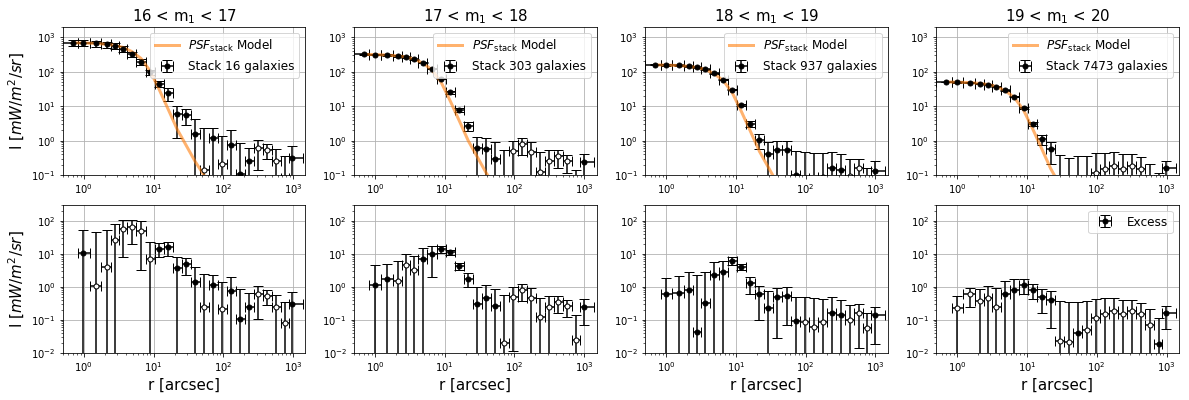

In [3]:
from stack import *

for ifield in [4,5,6,7,8]:
    for inst in [1,2]:
        plt.close()
        fig, ax = plt.subplots(2, 4, figsize = (20,6))
        for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
            stackdat = stacking(inst, ifield, m_min, m_max,
                                load_from_file=True, BGsub=False).stackdat
            plot_err_log(stackdat['rbins'], 
                         stackdat['profcb'],
                         np.sqrt(np.diag(stackdat['cov']['profcb'])),
                         ax=ax[0][im], color='k',label='Stack %d galaxies'%stackdat['Nsrc'])
            ax[0][im].loglog(stackdat['rbins'],stackdat['PSF']['profcb'],
                          'C1', alpha=0.6, lw=3, label=r'$PSF_{\rm stack}$ Model')
            ax[0][im].set_ylim([1e-1,2e3])
            ax[0][im].set_xlim([5e-1,1.5e3])
            ax[0][im].grid()    
            ax[0][im].set_title(r'%d < m$_1$ < %d'%(m_min, m_max), fontsize=15)
            ax[0][im].legend(fontsize=12)
            
            plot_err_log(stackdat['rbins'], 
                         stackdat['ex']['profcb'],
                         np.sqrt(np.diag(stackdat['excov']['profcb'])),
                         ax=ax[1][im], color='k',label='Excess')
            ax[1][im].set_ylim([1e-2,3e2])
            ax[1][im].set_xlim([5e-1,1.5e3])
            ax[1][im].grid()    
            ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

        ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
        ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
        ax[1][-1].legend(fontsize=12)

        plt.savefig('plots/paperfig/profile_TM%d_%s.pdf'%(inst, fieldnamedict[ifield]),
                    dpi = 150, bbox_inches='tight')

#### field-averaged

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils_plotting.py:78: RuntimeWarning: invalid value encountered in greater_equal
  spp = np.where(y>=0)[0]
/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils_plotting.py:79: RuntimeWarning: invalid value encountered in less
  spn = np.where(y<0)[0]


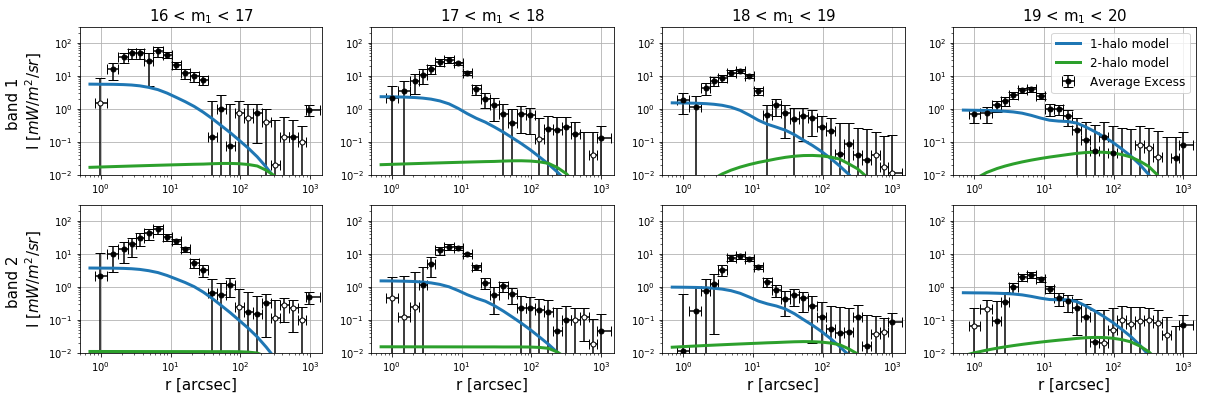

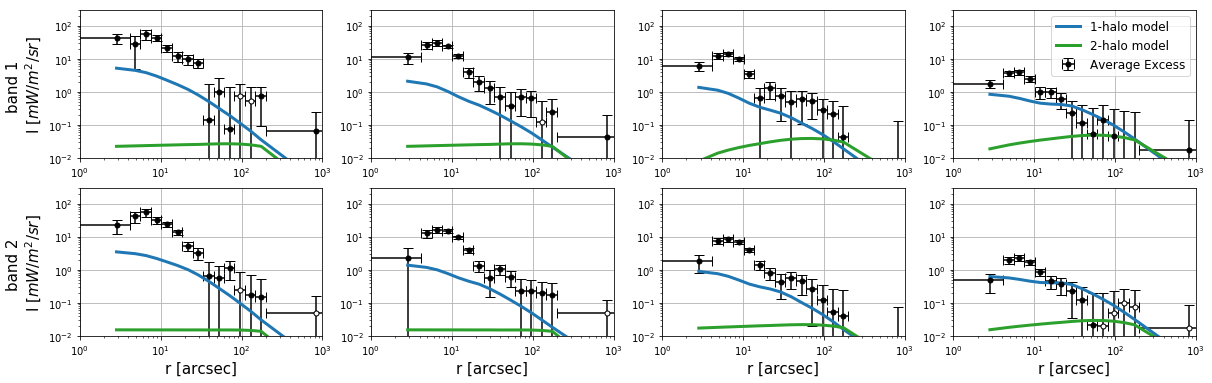

In [4]:
from stack import *
from micecat import *
from micecat_auto import *

fig1, ax1 = plt.subplots(2, 4, figsize = (20,6))
fig2, ax2 = plt.subplots(2, 4, figsize = (20,6))

for inst in [1,2]:
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        profd_arr, profd_err = 0, 0
        profdsub_arr, profdsub_err = 0, 0
        for ifield in [4,5,6,7,8]:
            stackdat = stacking(inst, ifield, m_min, m_max,
                                load_from_file=True, BGsub=False).stackdat

            profd_arri = stackdat['ex']['profcb']
            profd_erri = np.sqrt(np.diag(stackdat['excov']['profcb']))
            profd_arr += profd_arri / profd_erri**2
            profd_err += 1 / profd_erri**2
            profdsub_arri = stackdat['ex']['profcbsub']
            profdsub_erri = np.sqrt(np.diag(stackdat['excov']['profcbsub']))
            profdsub_arr += profdsub_arri / profdsub_erri**2
            profdsub_err += 1 / profdsub_erri**2

        profd_arr /= profd_err
        profd_err = np.sqrt(1 / profd_err)
        profdsub_arr /= profdsub_err
        profdsub_err = np.sqrt(1 / profdsub_err)

        plot_err_log(stackdat['rbins'], 
                 profd_arr,profd_err,
                 ax=ax1[inst-1][im], color='k',label='Average Excess')
        plot_err_log(stackdat['rsubbins'], 
                 profdsub_arr,profdsub_err,
                 xedges = stackdat['rsubbinedges'],
                 ax=ax2[inst-1][im], color='k',label='Average Excess')
        
        _, mc_1h, _, _ = get_micecat_sim_1h(inst, im, Mhcut=1e14, 
                                            R200cut=0, zcut=0.15, sub=False)
        _, mc_2h,  = micecat_profile_fit(inst, im, filt_order=filt_order,
                                         sub=False, return_full=False)

        ax1[inst-1][im].plot(stackdat['rbins'], mc_1h, 'C0', lw=3, label='1-halo model')
        ax1[inst-1][im].plot(stackdat['rbins'], mc_2h, 'C2', lw=3, label='2-halo model')

        _, mc_1h, _, _ = get_micecat_sim_1h(inst, im, Mhcut=1e14, 
                                            R200cut=0, zcut=0.15, sub=True)
        _, mc_2h,  = micecat_profile_fit(inst, im, filt_order=filt_order,
                                         sub=True, return_full=False)

        ax2[inst-1][im].plot(stackdat['rsubbins'], mc_1h, 'C0', lw=3, label='1-halo model')
        ax2[inst-1][im].plot(stackdat['rsubbins'], mc_2h, 'C2', lw=3, label='2-halo model')

        ax1[inst-1][im].set_ylim([1e-2,3e2])
        ax1[inst-1][im].set_xlim([5e-1,1.5e3])
        ax1[0][im].set_title(r'%d < m$_1$ < %d'%(m_min, m_max), fontsize=15)
        ax1[inst-1][im].grid() 
        ax1[1][im].set_xlabel('r [arcsec]', fontsize=15)
        
        ax2[inst-1][im].set_ylim([1e-2,3e2])
        ax2[inst-1][im].set_xlim([1e0,1e3])
        ax2[inst-1][im].grid()    
        ax2[1][im].set_xlabel('r [arcsec]', fontsize=15)

    ax1[0][0].set_ylabel('band 1 \nI [$mW/m^2/sr$]', fontsize=15)
    ax2[0][0].set_ylabel('band 1 \nI [$mW/m^2/sr$]', fontsize=15)
    ax1[1][0].set_ylabel('band 2 \nI [$mW/m^2/sr$]', fontsize=15)
    ax2[1][0].set_ylabel('band 2 \nI [$mW/m^2/sr$]', fontsize=15)
    ax1[0][-1].legend(fontsize=12)
    ax2[0][-1].legend(fontsize=12)

    fig1.savefig('plots/paperfig/profile_avg.pdf',
                dpi = 150, bbox_inches='tight')

Text(0, 0.5, '$m_{\\rm AB}$')

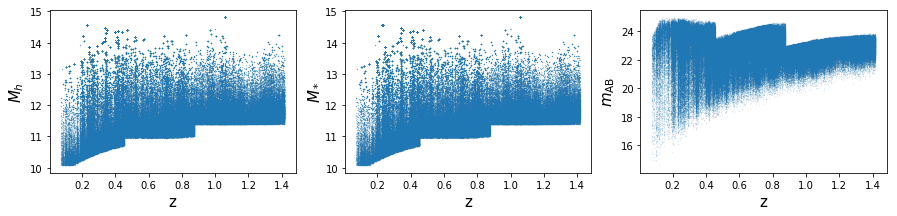

In [61]:
from micecat import *
# df = get_micecat_df(0, add_Rvir=True, return_full=True)

fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].plot(df['z_cgal'], df['lmhalo'],'.', markersize=0.1)
ax[1].plot(df['z_cgal'], df['lmhalo'],'.', markersize=0.1)
ax[2].plot(df['z_cgal'], df['I'],'.', markersize=0.1)
ax[0].set_xlabel('z',fontsize=15)
ax[1].set_xlabel('z',fontsize=15)
ax[2].set_xlabel('z',fontsize=15)
ax[0].set_ylabel(r'$M_h$',fontsize=15)
ax[1].set_ylabel(r'$M_*$',fontsize=15)
ax[2].set_ylabel(r'$m_{\rm AB}$',fontsize=15)

0.04892729835304897
0 0.9336963643388437 0.9999723214129728 0.8617413797631874
2.415409864960018
1 0.8284799350362742 0.7891770993717191 0.9667955812988249
1.5668880723147203
2 0.9438903152636201 0.9052242696101076 0.8083400263023197
2.3090998336599906
3 0.9773571883216378 0.8049294296051411 0.9985695414206096
3.954524646980097
4 0.7207597132611816 0.5559817373085231 0.9884791774754015
1.2800996265088975
0 0.5772882251616258 0.9369660291707417 0.9578064560928504
3.673320031326114
1 0.28825454753911717 0.5973393028834334 0.6560318333792342
5.687628877445788
2 0.7574463900787215 0.33780989492198693 0.9573697270384558
6.403986210999045
3 0.9931536499559093 0.268869138331333 0.9994739092324
6.370843103102261
4 0.9441195118550202 0.2717876464433167 0.9998437930836912
---------
41.17054245118107 71.7346634507752 23.377440709367953
---------


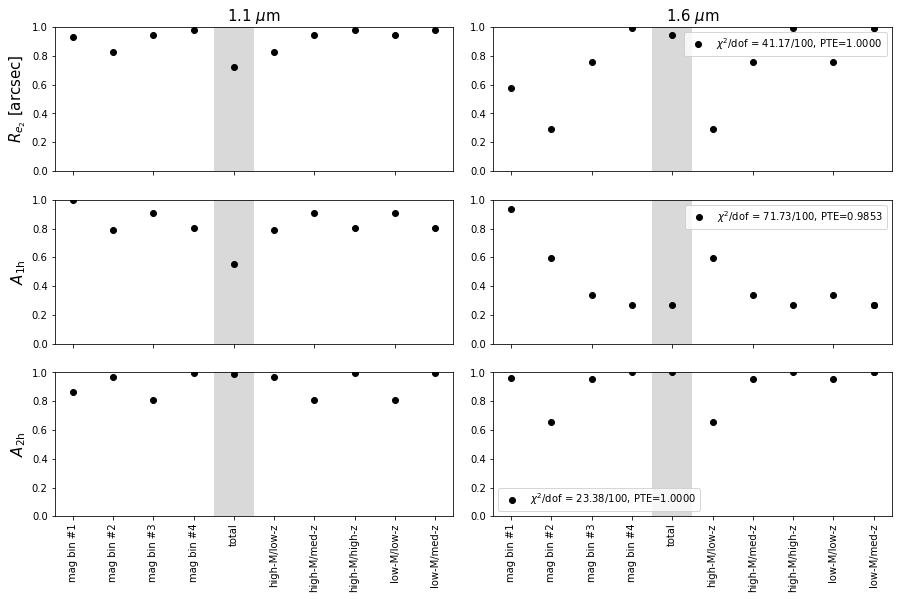

In [6]:
from run_fit import *

fig, ax = plt.subplots(3,2, figsize = (15,9))
ci=68
xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]

chi2Retot, chi2A1htot, chi2A2htot = 0, 0, 0
for j,inst in enumerate([1,2]):
    for i,(im,xpos) in enumerate(zip([0,1,2,3,None],[0,1,2,3,4])):
        subsub = True if im==0 else False
        
        ifield = None
        if im is None:
            savename='mcmc_3par_joint_m17_20.npy'
        else:
            m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
            fitparamdat = get_mcmc_fit_params_3par(inst, im, ifield=ifield, subsub=subsub, ci=ci)
        
        Re0  = fitparamdat['Re2']
        sigRe0_l = fitparamdat['Re2']-fitparamdat['Re2_low']
        sigRe0_h = fitparamdat['Re2_high']-fitparamdat['Re2']

        A1h0  = fitparamdat['A1h']
        sig1h0_l = fitparamdat['A1h']-fitparamdat['A1h_low']
        sig1h0_h = fitparamdat['A1h_high']-fitparamdat['A1h']

        A2h0  = fitparamdat['A2h']
        sig2h0_l = fitparamdat['A2h']-fitparamdat['A2h_low']
        sig2h0_h = fitparamdat['A2h_high']-fitparamdat['A2h']
        
        chi2Re, chi2A1h, chi2A2h = 0, 0, 0
        for ifield in [4,5,6,7,8]:
            if im is None:
                m_min ,m_max = 17, 20
                savename='mcmc_3par_%s_m17_20.npy'%(fieldnamedict[ifield])
                fitparamdat = get_mcmc_fit_params_3par(inst, 3, ifield=ifield,savename=savename, ci=ci)

            else:
                m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
                fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield, subsub=subsub, ci=ci)
                
            Re  = fitparamdat['Re2']
            sigRe_l = fitparamdat['Re2']-fitparamdat['Re2_low']
            sigRe_h = fitparamdat['Re2_high']-fitparamdat['Re2']

            A1h  = fitparamdat['A1h']
            sig1h_l = fitparamdat['A1h']-fitparamdat['A1h_low']
            sig1h_h = fitparamdat['A1h_high']-fitparamdat['A1h']

            A2h  = fitparamdat['A2h']
            sig2h_l = fitparamdat['A2h']-fitparamdat['A2h_low']
            sig2h_h = fitparamdat['A2h_high']-fitparamdat['A2h']
            
            if Re > Re0:
                chi2Re += (Re-Re0)**2/(sigRe_l**2+sigRe0_h**2)
            else:
                chi2Re += (Re-Re0)**2/(sigRe_h**2+sigRe0_l**2)
                
            if A1h > A1h0:
                chi2A1h += (A1h-A1h0)**2/(sig1h_l**2+sig1h0_h**2)
            else:
                chi2A1h += (A1h-A1h0)**2/(sig1h_h**2+sig1h0_l**2)

            if A2h > A2h0:
                chi2A2h += (A2h-A2h0)**2/(sig2h_l**2+sig2h0_h**2)
            else:
                chi2A2h += (A2h-A2h0)**2/(sig2h_h**2+sig2h0_l**2)
        
        pteRe = scipy.stats.distributions.chi2.sf(chi2Re, 5)
        pteA1h = scipy.stats.distributions.chi2.sf(chi2A1h, 5)
        pteA2h = scipy.stats.distributions.chi2.sf(chi2A2h, 5)
        
        ax[0][j].plot([xpos], [pteRe], 'ko')
        ax[1][j].plot([xpos], [pteA1h], 'ko')
        ax[2][j].plot([xpos], [pteA2h], 'ko')
        
        print(chi2A1h)
        print(i, pteRe, pteA1h, pteA2h)
        
        chi2Retot+=chi2Re
        chi2A1htot+=chi2A1h
        chi2A2htot+=chi2A2h
    for i,(im,M_min,M_max, xpos) in enumerate(zip([1,2,3,2,3],
                                            [-23,-23,-23,-22,-22],
                                            [-22,-22,-22,-21,-21],
                                            [5,6,7,8,9])):
        m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]

        ifield = None
        savename='mcmc_3par_joint_m%d_%d_Mabs%d_%d.npy'%(m_min,m_max,M_min,M_max)
        fitparamdat = get_mcmc_fit_params_3par(inst, im, ifield=ifield, subsub=subsub, ci=ci)
        
        Re0  = fitparamdat['Re2']
        sigRe0_l = fitparamdat['Re2']-fitparamdat['Re2_low']
        sigRe0_h = fitparamdat['Re2_high']-fitparamdat['Re2']

        A1h0  = fitparamdat['A1h']
        sig1h0_l = fitparamdat['A1h']-fitparamdat['A1h_low']
        sig1h0_h = fitparamdat['A1h_high']-fitparamdat['A1h']

        A2h0  = fitparamdat['A2h']
        sig2h0_l = fitparamdat['A2h']-fitparamdat['A2h_low']
        sig2h0_h = fitparamdat['A2h_high']-fitparamdat['A2h']
        
        chi2Re, chi2A1h, chi2A2h = 0, 0, 0
        for ifield in [4,5,6,7,8]:
            savename='mcmc_3par_%s_m%d_%d_Mabs%d_%d.npy'%(fieldnamedict[ifield],
                                                          m_min,m_max,M_min,M_max)
            fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield, subsub=subsub, ci=ci)
                
            Re  = fitparamdat['Re2']
            sigRe_l = fitparamdat['Re2']-fitparamdat['Re2_low']
            sigRe_h = fitparamdat['Re2_high']-fitparamdat['Re2']

            A1h  = fitparamdat['A1h']
            sig1h_l = fitparamdat['A1h']-fitparamdat['A1h_low']
            sig1h_h = fitparamdat['A1h_high']-fitparamdat['A1h']

            A2h  = fitparamdat['A2h']
            sig2h_l = fitparamdat['A2h']-fitparamdat['A2h_low']
            sig2h_h = fitparamdat['A2h_high']-fitparamdat['A2h']
            
            if Re > Re0:
                chi2Re += (Re-Re0)**2/(sigRe_l**2+sigRe0_h**2)
            else:
                chi2Re += (Re-Re0)**2/(sigRe_h**2+sigRe0_l**2)
                
            if A1h > A1h0:
                chi2A1h += (A1h-A1h0)**2/(sig1h_l**2+sig1h0_h**2)
            else:
                chi2A1h += (A1h-A1h0)**2/(sig1h_h**2+sig1h0_l**2)

            if A2h > A2h0:
                chi2A2h += (A2h-A2h0)**2/(sig2h_l**2+sig2h0_h**2)
            else:
                chi2A2h += (A2h-A2h0)**2/(sig2h_h**2+sig2h0_l**2)
        
        pteRe = scipy.stats.distributions.chi2.sf(chi2Re, 5)
        pteA1h = scipy.stats.distributions.chi2.sf(chi2A1h, 5)
        pteA2h = scipy.stats.distributions.chi2.sf(chi2A2h, 5)
        ax[0][j].plot([xpos], [pteRe], 'ko')
        ax[1][j].plot([xpos], [pteA1h], 'ko')
        ax[2][j].plot([xpos], [pteA2h], 'ko')

#         print(i, pteRe, pteA1h, pteA2h)
        chi2Retot+=chi2Re
        chi2A1htot+=chi2A1h
        chi2A2htot+=chi2A2h        

    ax[0][j].axvspan(3.5, 4.5, alpha=0.15, facecolor='k')
    ax[1][j].axvspan(3.5, 4.5, alpha=0.15, facecolor='k')
    ax[2][j].axvspan(3.5, 4.5, alpha=0.15, facecolor='k')
    
#     ax[0][j].set_ylim([1e-3,1])
#     ax[1][j].set_ylim([1e-2,1])
#     ax[2][j].set_ylim([1e-4,1])
#     ax[0][j].set_yscale('log')
#     ax[1][j].set_yscale('log')
#     ax[2][j].set_yscale('log')
    ax[0][j].set_ylim([0,1])
    ax[1][j].set_ylim([0,1])
    ax[2][j].set_ylim([0,1])

print('---------')
print(chi2Retot, chi2A1htot, chi2A2htot)
pteRetot = scipy.stats.distributions.chi2.sf(chi2Retot, 100)
pteA1htot = scipy.stats.distributions.chi2.sf(chi2A1htot, 100)
pteA2htot = scipy.stats.distributions.chi2.sf(chi2A2htot, 100)

ax[0][j].plot([xpos], [pteRe], 'ko', label='$\chi^2$/dof = %.2f/100, PTE=%.4f'%(chi2Retot,pteRetot))
ax[1][j].plot([xpos], [pteA1h], 'ko', label='$\chi^2$/dof = %.2f/100, PTE=%.4f'%(chi2A1htot,pteA1htot))
ax[2][j].plot([xpos], [pteA2h], 'ko', label='$\chi^2$/dof = %.2f/100, PTE=%.4f'%(chi2A2htot,pteA2htot))
ax[0][j].legend(fontsize=10)
ax[1][j].legend(fontsize=10)
ax[2][j].legend(fontsize=10)
print('---------')

ax[0][0].set_ylabel(r"$R_{e_2}$ [arcsec]", fontsize=15)
ax[1][0].set_ylabel(r"$A_{\rm 1h}$", fontsize=15)
ax[2][0].set_ylabel(r"$A_{\rm 2h}$", fontsize=15)
ax[0][1].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][1].set_xticklabels([])
ax[0][0].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[2][0].set_xticklabels([])
names = ['mag bin #1', 'mag bin #2', 'mag bin #3', 'mag bin #4', 'total',
        'high-M/low-z', 'high-M/med-z', 'high-M/high-z', 'low-M/low-z', 'low-M/med-z']
ax[-1][0].set_xticks(np.arange(10))
ax[-1][1].set_xticks(np.arange(10))
ax[-1][0].set_xticklabels(names,rotation = 90)
ax[-1][1].set_xticklabels(names,rotation = 90)
ax[0][0].set_title(r'1.1 $\mu$m', fontsize=15)
ax[0][1].set_title(r'1.6 $\mu$m', fontsize=15)
plt.subplots_adjust(wspace=0.1)

plt.savefig('/Users/ytcheng/Desktop/params_pte.png', dpi = 150, bbox_inches='tight')

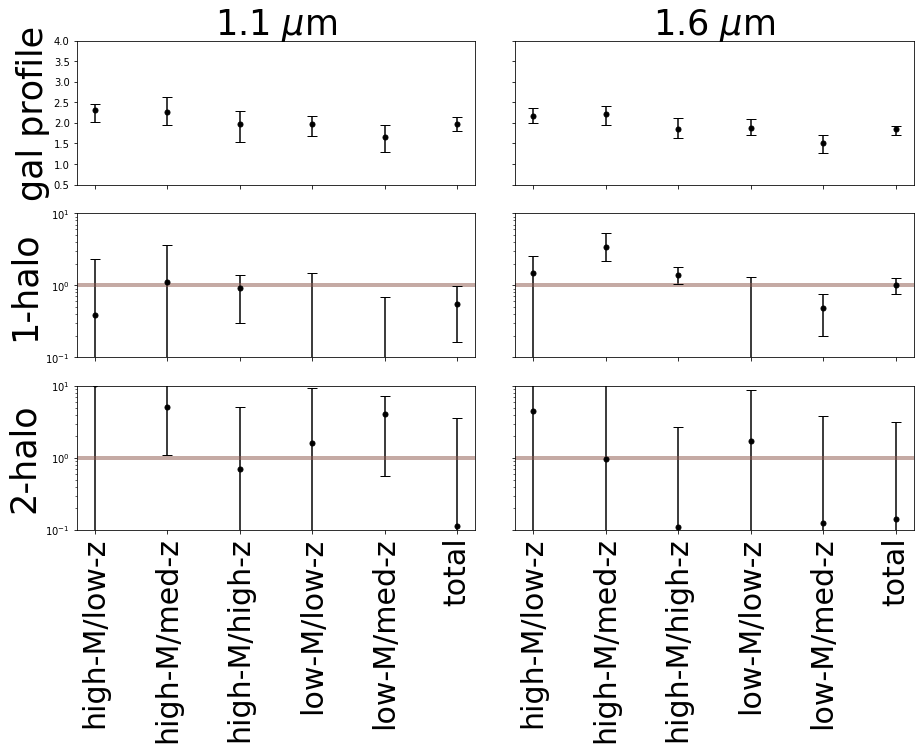

In [2]:
from run_fit import *

fig, ax = plt.subplots(3,2, figsize = (15,9))
xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
for j,inst in enumerate([1,2]):
    ax[1][j].axhline(1, c='C5',lw=4, ls='-',alpha=0.5)
    ax[2][j].axhline(1, c='C5',lw=4, ls='-',alpha=0.5)
    
    msize = 10
    alpha = 1
    xoff = 0
    ifield = None
    fieldname = 'joint'
    c = 'k'
    xpos = 5
    
    savename='mcmc_3par_joint_m17_20.npy'
    fitparamdat = get_mcmc_fit_params_3par(inst,3, ifield=ifield, savename=savename)
    ax[0][j].errorbar([xpos+xoff], [fitparamdat['Re2']],
                      [[fitparamdat['Re2'] - fitparamdat['Re2_low']],
                       [fitparamdat['Re2_high'] - fitparamdat['Re2']]],
                  fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)
    ax[1][j].errorbar([xpos+xoff], [fitparamdat['A1h']],
                      [[fitparamdat['A1h'] - fitparamdat['A1h_low']],
                       [fitparamdat['A1h_high'] - fitparamdat['A1h']]],
                  fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)
    ax[2][j].errorbar([xpos+xoff], [fitparamdat['A2h']],
                      [[fitparamdat['A2h'] - fitparamdat['A2h_low']],
                       [fitparamdat['A2h_high'] - fitparamdat['A2h']]],
                  fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)


    for i,(im,M_min,M_max,xpos) in enumerate(zip([1,2,3,2,3],
                                            [-23,-23,-23,-22,-22],
                                            [-22,-22,-22,-21,-21],
                                            [0,1,2,3,4])):
        m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
        savename='mcmc_3par_joint_m%d_%d_Mabs%d_%d.npy'%(m_min,m_max,M_min,M_max)
        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield,savename=savename)

        ax[0][j].errorbar([xpos+xoff], [fitparamdat['Re2']],
                          [[fitparamdat['Re2'] - fitparamdat['Re2_low']],
                           [fitparamdat['Re2_high'] - fitparamdat['Re2']]],
                      fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)
        ax[1][j].errorbar([xpos+xoff], [fitparamdat['A1h']],
                          [[fitparamdat['A1h'] - fitparamdat['A1h_low']],
                           [fitparamdat['A1h_high'] - fitparamdat['A1h']]],
                      fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)
        ax[2][j].errorbar([xpos+xoff], [fitparamdat['A2h']],
                          [[fitparamdat['A2h'] - fitparamdat['A2h_low']],
                           [fitparamdat['A2h_high'] - fitparamdat['A2h']]],
                      fmt='.', capsize=5, markersize=msize, c=c,alpha=alpha)

#     ax[0][j].axvline(4.5, c='k',lw=2, ls='--',alpha=0.5)
#     ax[1][j].axvline(4.5, c='k',lw=2, ls='--',alpha=0.5)
#     ax[2][j].axvline(4.5, c='k',lw=2, ls='--',alpha=0.5)
    
    ax[0][j].set_ylim([0.5,4])
    ax[1][j].set_ylim([1e-1,1e1])
    ax[2][j].set_ylim([1e-1,1e1])
    ax[1][j].set_yscale('log')
    ax[2][j].set_yscale('log')
ax[0][0].set_ylabel('gal profile', fontsize=35)
ax[1][0].set_ylabel('1-halo', fontsize=35)
ax[2][0].set_ylabel('2-halo', fontsize=35)
ax[0][1].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][1].set_xticklabels([])
ax[0][1].set_yticklabels([])
ax[1][1].set_yticklabels([])
ax[2][1].set_yticklabels([])
ax[0][0].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[2][0].set_xticklabels([])
names = ['high-M/low-z', 'high-M/med-z', 'high-M/high-z', 'low-M/low-z', 'low-M/med-z','total']
ax[-1][0].set_xticks(np.arange(6))
ax[-1][1].set_xticks(np.arange(6))
ax[-1][0].set_xticklabels(names,rotation = 90, fontsize=30)
ax[-1][1].set_xticklabels(names,rotation = 90, fontsize=30)
ax[0][0].set_title(r'1.1 $\mu$m', fontsize=35)
ax[0][1].set_title(r'1.6 $\mu$m', fontsize=35)
plt.subplots_adjust(wspace=0.1)
plt.savefig('plots/slides/params_best.png', dpi = 150, bbox_inches='tight')

***
# Plot for MZ's Proposal

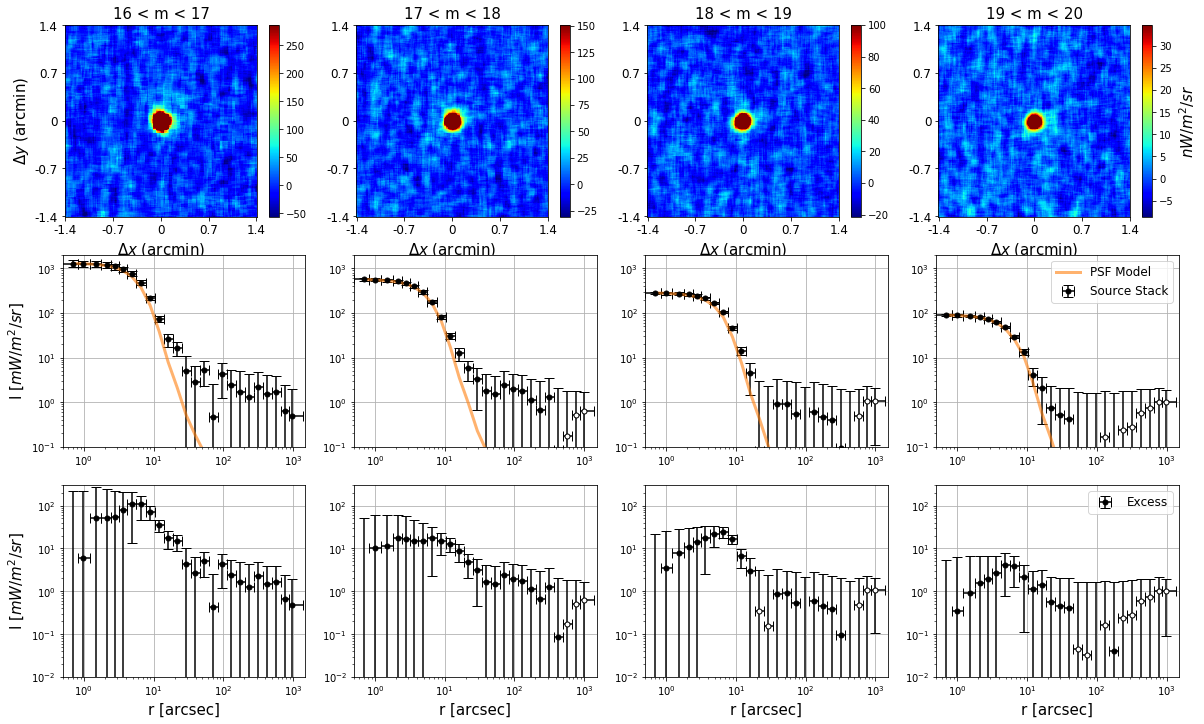

In [149]:
from stack import *

inst = 1
ifield = 6

fig, ax = plt.subplots(3, 4, figsize = (20,12))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True, BGsub=False).stackdat
    plot_err_log(stackdat['rbins'], 
                 stackdat['profcb'],
                 np.sqrt(np.diag(stackdat['cov']['profcb'])),
                 ax=ax[1][im], color='k',label='Source Stack')
    ax[1][im].loglog(stackdat['rbins'],stackdat['PSF']['profcb'],
                  'C1', alpha=0.6, lw=3, label='PSF Model')
    ax[1][im].set_ylim([1e-1,2e3])
    ax[1][im].set_xlim([5e-1,1.5e3])
    ax[1][im].grid()    

    plot_err_log(stackdat['rbins'], 
                 stackdat['ex']['profcb'],
                 np.sqrt(np.diag(stackdat['excov']['profcb'])),
                 ax=ax[2][im], color='k',label='Excess')
    ax[2][im].set_ylim([1e-2,3e2])
    ax[2][im].set_xlim([5e-1,1.5e3])
    ax[2][im].grid()    
    ax[2][im].set_xlabel('r [arcsec]', fontsize=15)

    axi = ax[0][im]
    p = imageclip(stackdat['cbmapstack'], ax=axi, return_objects=True)
    p['cbar'].remove()
    vmin, vmax = p['vmin'], p['vmax']
    stackmap = stackdat['cbmapstack'][1080:1321, 1080:1321]
    pixticks1 = np.linspace(0,240,5)
    pixtick_labels1 = ['-1.4', '-0.7', '0', '0.7', '1.4']
    p = imageclip(stackmap, ax=axi, return_objects=True, vmin=vmin, vmax=vmax*5)
    if im==3:
        p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks1)
    axi.set_xticklabels(pixtick_labels1, fontsize=12)
    axi.set_yticks(pixticks1)
    axi.set_yticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    if im==0:
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
    axi.set_title('%d < m < %d'%(m_min, m_max), fontsize=15)

ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
ax[2][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
ax[1][-1].legend(fontsize=12)
ax[2][-1].legend(fontsize=12)

plt.savefig('/Users/sers/ytcheng/ciber/doc/MZ_TM%d_%s.pdf'%(inst, fieldnamedict[ifield]),
            dpi = 200, bbox_inches='tight')

In [ ]:
# from stack import *
# stacking(1,4, 17, 18, savemaps=True, srctype='g',
#          savename='./stack_data/stackdat_TM1_elat10_17_18_filt5_g_map')
# stacking(1,4, 17, 18, savemaps=True, srctype='s',
#          savename='./stack_data/stackdat_TM1_elat10_17_18_filt5_s_map')

# stacking(1,4, 18, 19, savemaps=True, srctype='g',
#          savename='./stack_data/stackdat_TM1_elat10_18_19_filt5_g_map')
# stacking(1,4, 18, 19, savemaps=True, srctype='s',
#          savename='./stack_data/stackdat_TM1_elat10_18_19_filt5_s_map')

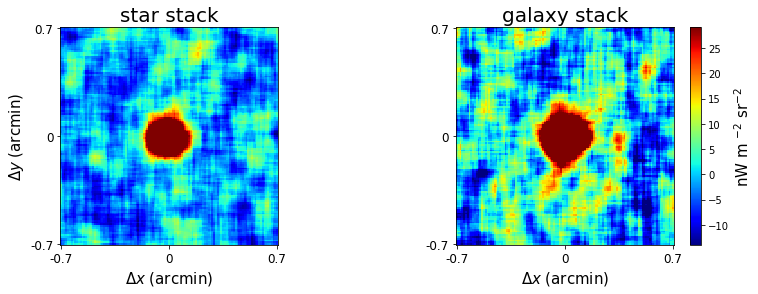

In [14]:
from stack import *

inst = 1
ifield = 4
m_min, m_max = 18, 19

fig, ax = plt.subplots(1,2,figsize=(13,4))

axi = ax[0]
stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True,
                savename='./stack_data/stackdat_TM1_elat10_%d_%d_filt5_s_map'%(m_min, m_max)).stackdat
m = stackdat['cbmapstack']
p = imageclip(m, ax=axi, return_objects=True)
p['cbar'].remove()
vmin, vmax = p['vmin'], p['vmax']
m = m[1140:1261, 1140:1261]
pixticks1 = np.linspace(0,120,3)
pixtick_labels1 = ['-0.7', '0', '0.7']
p = imageclip(m, ax=axi, return_objects=True, vmin=vmin, vmax=vmax*2)
p['cbar'].remove()

axi.set_xticks(pixticks1)
axi.set_xticklabels(pixtick_labels1, fontsize=12)
axi.set_yticks(pixticks1)
axi.set_yticklabels(pixtick_labels1, fontsize=12)
axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
axi.set_title('star stack', fontsize=20)

axi = ax[1]
stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True,
                savename='./stack_data/stackdat_TM1_elat10_%d_%d_filt5_g_map'%(m_min, m_max)).stackdat
m = stackdat['cbmapstack']
m = m[1140:1261, 1140:1261]
pixticks1 = np.linspace(0,120,3)
pixtick_labels1 = ['-0.7', '0', '0.7']
p = imageclip(m, ax=axi, return_objects=True, vmin=vmin, vmax=vmax*2)
p['cbar'].ax.set_ylabel('nW m $^{-2}$ sr$^{-2}$', rotation=90, fontsize=15)
axi.set_xticks(pixticks1)
axi.set_xticklabels(pixtick_labels1, fontsize=12)
axi.set_yticks(pixticks1)
axi.set_yticklabels(pixtick_labels1, fontsize=12)
axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
axi.set_title('galaxy stack', fontsize=20)
plt.savefig('/Users/ytcheng/Desktop/stackmaps.png',
            dpi = 200, bbox_inches='tight')

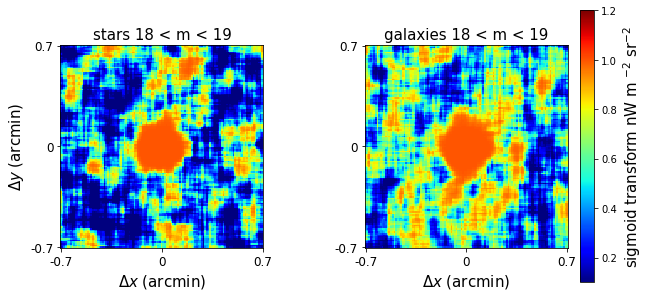

In [108]:
from stack import *

inst = 1
ifield = 4
m_min, m_max = 18, 19

fig, ax = plt.subplots(1,2,figsize=(10,5))

axi = ax[0]
stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True,
                savename='./stack_data/stackdat_TM1_elat10_%d_%d_filt5_s_map'%(m_min, m_max)).stackdat
m = stackdat['cbmapstack']
k = np.median(m[1200-10:1200+10, 1200-10:1200+10])/20
m = 1/(1 + np.exp(-m/k))
p = imageclip(m, ax=axi, return_objects=True)
p['cbar'].remove()
vmin, vmax = p['vmin'], p['vmax']
m = m[1140:1261, 1140:1261]
pixticks1 = np.linspace(0,120,3)
pixtick_labels1 = ['-0.7', '0', '0.7']
p = imageclip(m, ax=axi, return_objects=True, vmin=0.1,vmax=1.2)#vmin=vmin, vmax=vmax*1.2)
p['cbar'].remove()

axi.set_xticks(pixticks1)
axi.set_xticklabels(pixtick_labels1, fontsize=12)
axi.set_yticks(pixticks1)
axi.set_yticklabels(pixtick_labels1, fontsize=12)
axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
axi.set_title('stars %d < m < %d'%(m_min, m_max), fontsize=15)

axi = ax[1]
stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True,
                savename='./stack_data/stackdat_TM1_elat10_%d_%d_filt5_g_map'%(m_min, m_max)).stackdat
m = stackdat['cbmapstack']
k = np.median(m[1200-10:1200+10, 1200-10:1200+10])/20
m = 1/(1 + np.exp(-m/k))
m = m[1140:1261, 1140:1261]
pixticks1 = np.linspace(0,120,3)
pixtick_labels1 = ['-0.7', '0', '0.7']
p = imageclip(m, ax=axi, return_objects=True, vmin=0.1,vmax=1.2)#vmin=vmin, vmax=vmax*1.2)
p['cbar'].ax.set_ylabel('sigmoid transform nW m $^{-2}$ sr$^{-2}$', rotation=90, fontsize=15)
axi.set_xticks(pixticks1)
axi.set_xticklabels(pixtick_labels1, fontsize=12)
axi.set_yticks(pixticks1)
axi.set_yticklabels(pixtick_labels1, fontsize=12)
axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
axi.set_title('galaxies %d < m < %d'%(m_min, m_max), fontsize=15)
plt.savefig('/Users/ytcheng/Desktop/stackmaps_sigmoid.png',
            dpi = 200, bbox_inches='tight')